# Initialize

In [1]:
visible_devices = [2]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if len(visible_devices) == 0:
        visible_devices = int(visible_devices) # type: ignore
    elif len(visible_devices) == 1:
        if len(visible_devices[0]) == 0: # type: ignore
            visible_devices = int(visible_devices[0])
        else:
            visible_devices = [int(i) for i in visible_devices[0]] # type: ignore
    else:
        visible_devices = [int(i) for i in visible_devices]
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
gpu_models = get_gpu_info()
if gpu_models:
    training_device = gpu_models[eval(os.environ["CUDA_VISIBLE_DEVICES"])]
    print("Successfully loaded GPU model: {}".format(training_device))
else:
    training_device = 'undetermined'
    print("Failed to load GPU model. Defaulting to 'undetermined'.")
    
results_dir = "../results/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-03-28 18:34:15.479335: Importing os...
2024-03-28 18:34:15.479459: Importing sys...
Visible devices: [2]
2024-03-28 18:34:15.479817: Importing timer from timeit...
2024-03-28 18:34:15.479887: Setting env variables for tf import (only device [2] will be available)...
2024-03-28 18:34:15.480016: Importing numpy...
2024-03-28 18:34:15.597625: Importing matplotlib...


2024-03-28 18:34:15.935171: Importing h5py...
2024-03-28 18:34:15.958259: Importing importlib.util...
2024-03-28 18:34:15.958379: Importing json...
2024-03-28 18:34:15.958447: Importing pandas...
2024-03-28 18:34:16.280513: Importing random...
2024-03-28 18:34:16.280711: Importing scipy utils...
2024-03-28 18:34:16.584431: Importing subprocess...
2024-03-28 18:34:16.584581: Importing tensorflow...
Tensorflow version: 2.12.0
2024-03-28 18:34:18.823016: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-03-28 18:34:19.001844: Importing timeit...
2024-03-28 18:34:19.001912: Importing tqdm...
2024-03-28 18:34:19.004019: Importing typing...
2024-03-28 18:34:19.004101: Setting tf configs...
2024-03-28 18:34:19.203039: Importing GMetrics module...
2024-03-28 18:34:21.954200: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU model: NVIDIA A40
2024-03-28 18:34:22.015324: All done.


# Fixed $n$

## Null hypotheses $n=10000$

### Model definition

In [2]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
batch_size_test = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [5]:
TwoSampleTestInputs.dist_1_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [6]:
TwoSampleTestInputs.dist_2_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [7]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,verbose,is_symb_1,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample
0,10000,10000,10000,10000000,float64,0,True,False,True,True,5,0,True,5,0,float64,5,100000000,False


In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: (ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 5,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 10000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 100000000,
   'small_sample': False},
  'max_vectorize': 10000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/5D_10K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function

### Compute/save/load null hypotheses

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print("Loading",name,"from", file)
        obj.Results.load_from_json(file)
    else:
        print("Computing and savng",name)
        obj.Test_tf(**metric["kwargs"])
        print("Saving", name, "to", file)
        obj.Results.save_to_json(file)

#obj.Results[-1].result_value

Loading fn from ../results/5D_10K/null_hypothesis/FN.json
Loading fpd from ../results/5D_10K/null_hypothesis/FPD.json
Loading kpd from ../results/5D_10K/null_hypothesis/KPD.json
Loading ks from ../results/5D_10K/null_hypothesis/KS.json
Loading sks from ../results/5D_10K/null_hypothesis/SKS.json
Loading swd from ../results/5D_10K/null_hypothesis/SWD.json


In [11]:
cl_list = [0.68, 0.95, 0.99]

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.7179960706493972], [0.95, [9500, 500], 1.201933747163374], [0.99, [9900, 100], 1.5292055424498905]]
ThresholdS for metric fpd: [[0.68, [6800, 3199], 2.308521284482648], [0.95, [9500, 500], 4.329877652456557], [0.99, [9900, 100], 6.352959846557846]]
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.05022264825200568], [0.95, [9500, 500], 0.30746255888564705], [0.99, [9900, 100], 0.5753294046664447]]
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9149967015224115], [0.95, [9500, 500], 1.1313706138761246], [0.99, [9900, 100], 1.2855206049622938]]
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9094811805338137], [0.95, [9500, 500], 1.112986448315256], [0.99, [9900, 100], 1.2742067049480295]]
ThresholdS for metric swd: [[0.68, [6800, 3199], 0.6846650651711172], [0.95, [9500, 500], 0.985047394005539], [0.99, [9900, 100], 1.2118010945036854]]


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f49c96dcee0>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\overline{\|\cdot\|}_{F}$,../results/5D_10K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.7179960706493972], [0...."
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f49c96deb00>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$d_{\mathrm{FPD}}$,../results/5D_10K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 2.308521284482648], [0.9..."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f49c96deb90>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",5,$d_{\mathrm{KPD}}$,../results/5D_10K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.05022264825200568], [0..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f49c96dec20>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\overline{D}$,../results/5D_10K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9149967015224115], [0...."
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f49c96decb0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\widetilde{D}$,../results/5D_10K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.9094811805338137], [0...."
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f49c96ded40>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\widetilde{W}$,../results/5D_10K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.6846650651711172], [0...."
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f49c96dedd0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",2000,$t_{\mu}$,../results/5D_10K/null_hypothesis/LR.json,[]


### Plots of null-hypotheses

mu = 0.6452305607644878 +/- 0.000804590250120452
sigma = 0.2836530010629981 +/- 0.0026469574692446853


/tmp/ipykernel_19433/950403730.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_19433/950403730.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_19433/950403730.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_19433/950403730.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


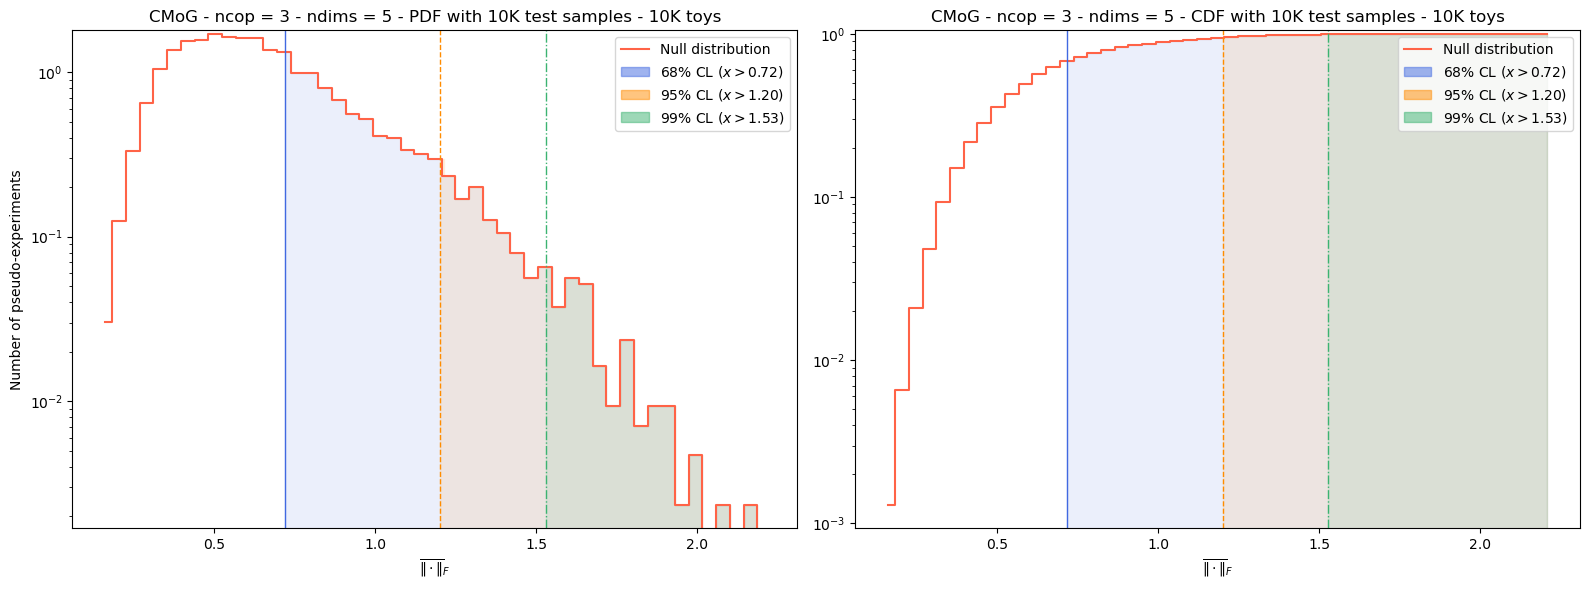

Time elapsed: 1.2626950070261955 seconds.
mu = 2.27543800796959 +/- 0.010743932197495061
sigma = 1.0365294109428378 +/- 0.01873596994870623


/tmp/ipykernel_19433/950403730.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_19433/950403730.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_19433/950403730.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


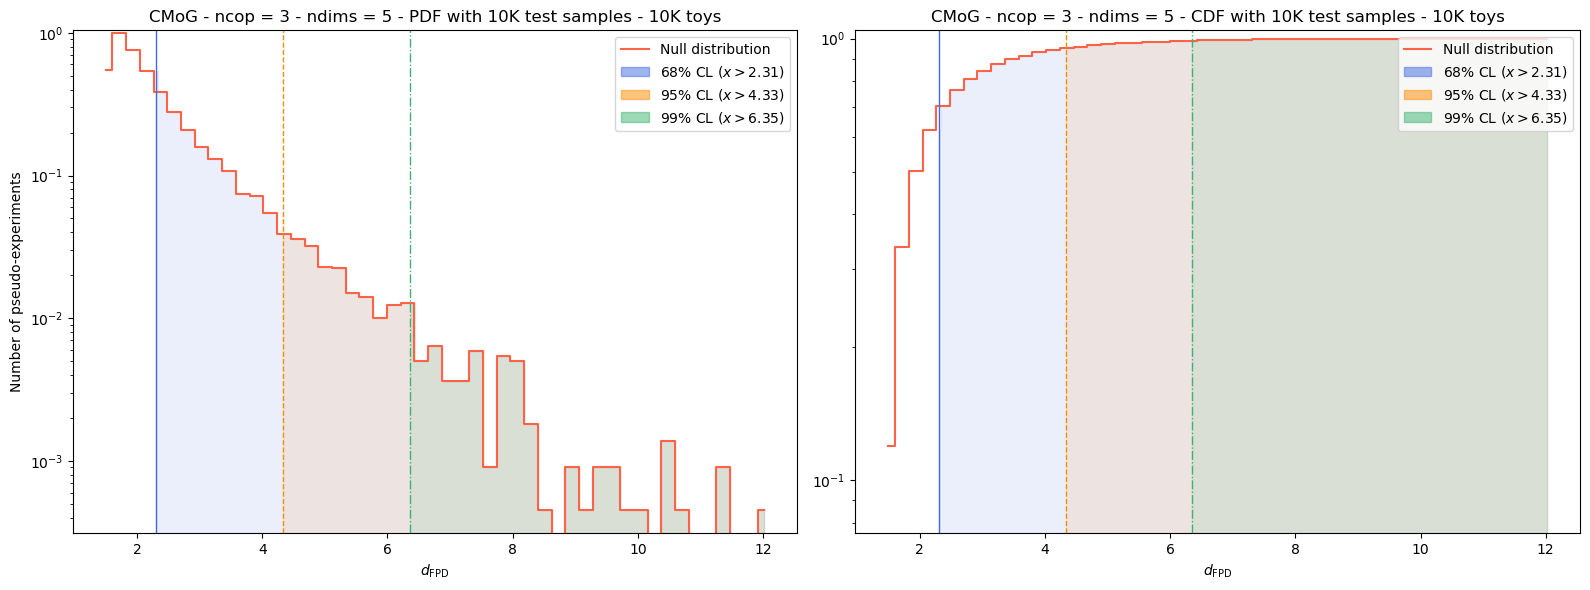

Time elapsed: 1.0653111636638641 seconds.
mu = 0.02847379976713676 +/- 0.00020773948169699742
sigma = 0.14413170424892555 +/- 0.0021606168872219094


/tmp/ipykernel_19433/950403730.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_19433/950403730.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_19433/950403730.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_19433/950403730.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


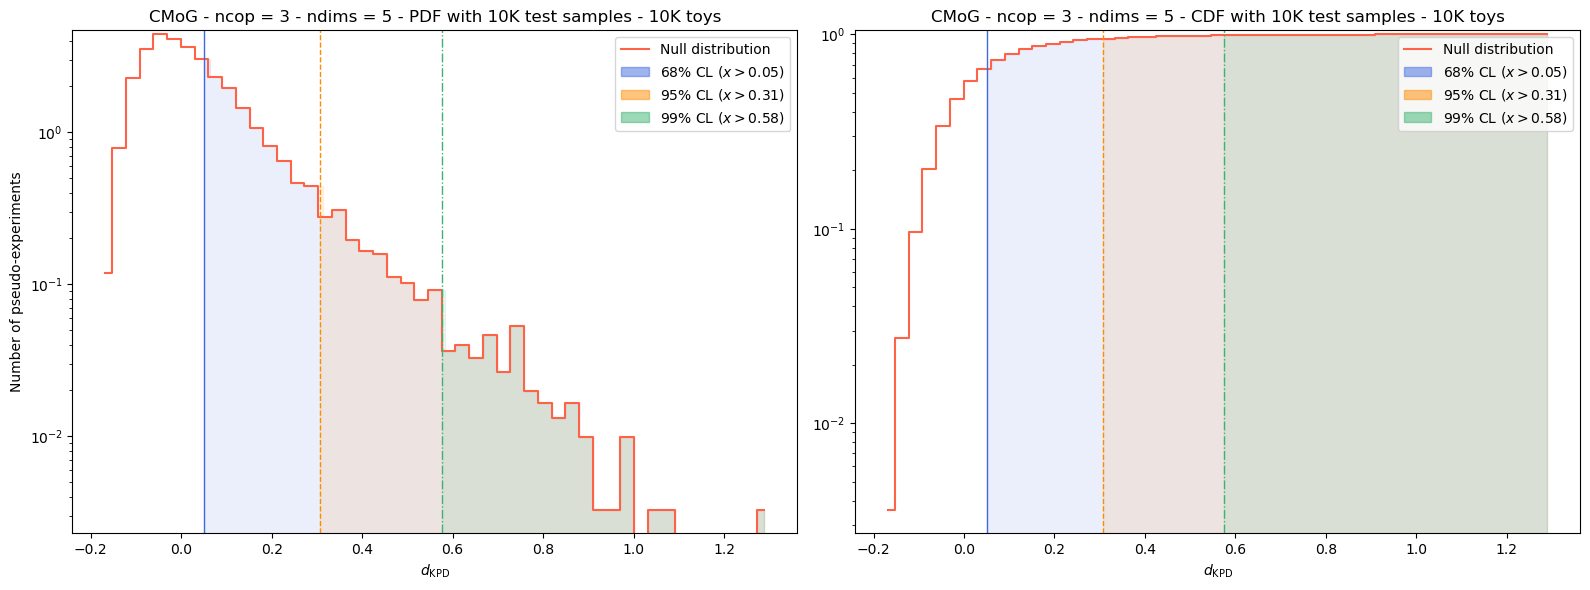

Time elapsed: 0.8719426691532135 seconds.
mu = 0.8653633032950525 +/- 0.00021026284393972245
sigma = 0.1450044288770941 +/- 0.0012640651357785568


/tmp/ipykernel_19433/950403730.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_19433/950403730.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_19433/950403730.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_19433/950403730.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


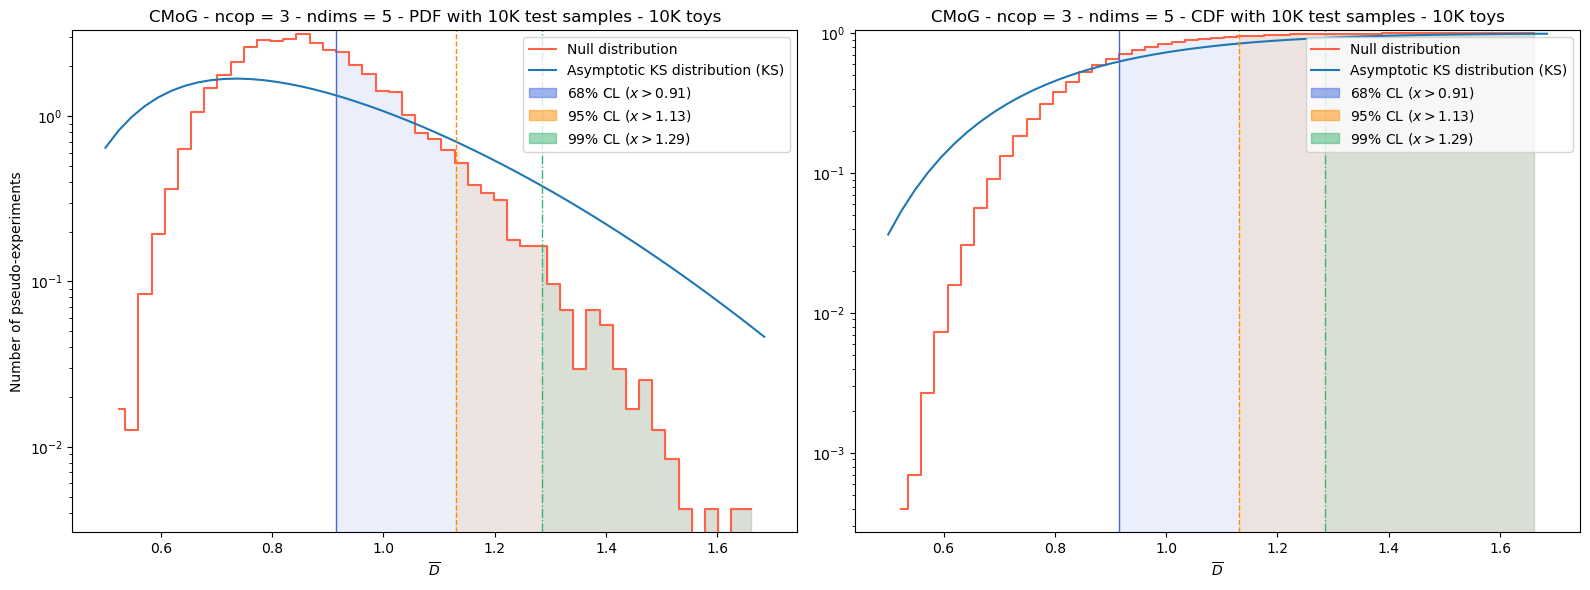

Time elapsed: 1.2390011455863714 seconds.
mu = 0.8663440549189074 +/- 0.0001759854097144226
sigma = 0.13265949257946927 +/- 0.0012042664783179845


/tmp/ipykernel_19433/950403730.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_19433/950403730.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_19433/950403730.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_19433/950403730.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


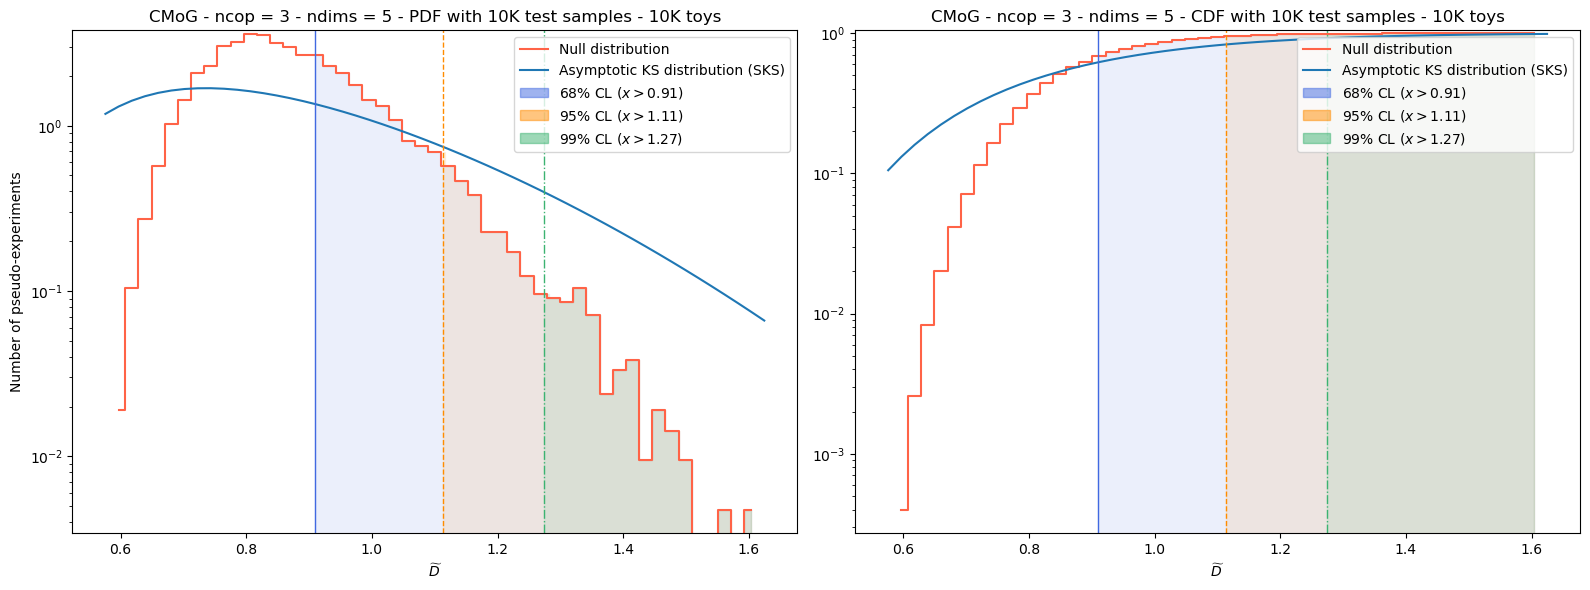

Time elapsed: 1.2311342470347881 seconds.
mu = 0.6334066155245102 +/- 0.0003345339556358687
sigma = 0.18290269424911942 +/- 0.0017628046230168954


/tmp/ipykernel_19433/950403730.py:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_19433/950403730.py:77: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_19433/950403730.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_19433/950403730.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


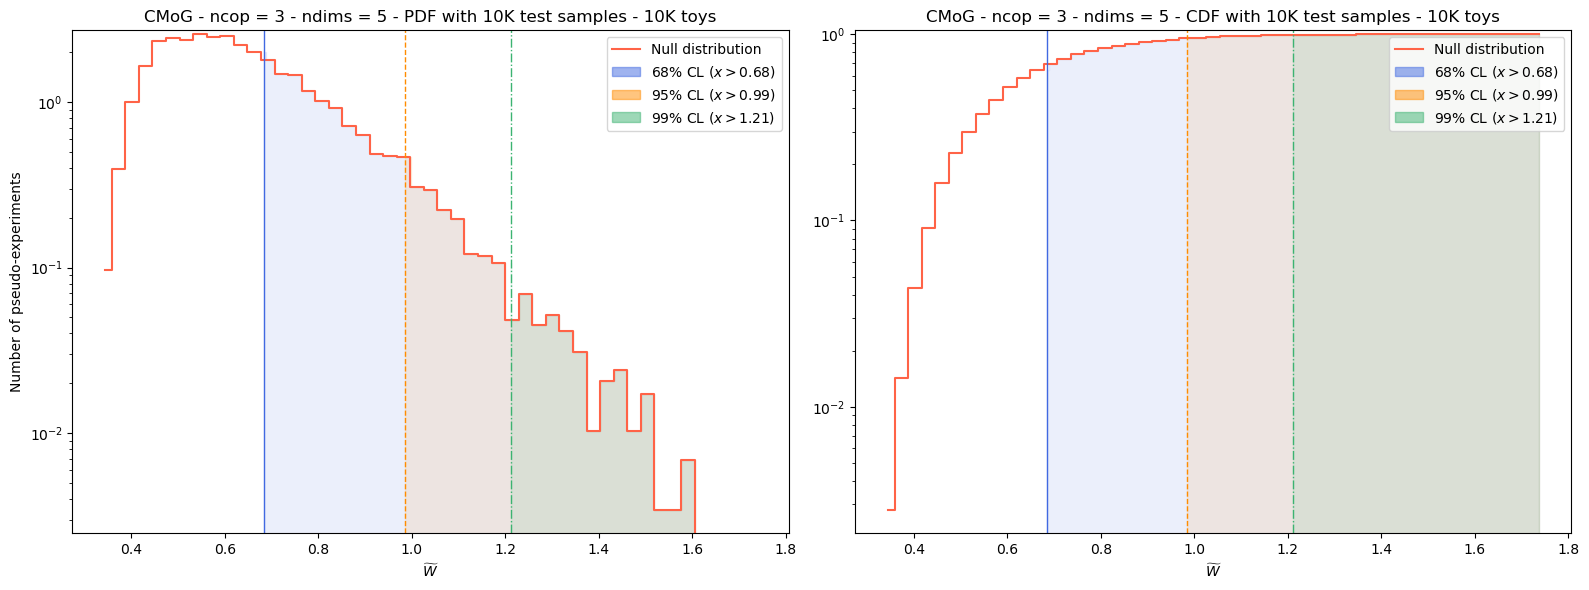

Time elapsed: 0.8633811492472887 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7fd7b3bcf0a0>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\overline{\|\cdot\|}_{F}$,../results/5D_10K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.7179960706493972], [0....",../results/5D_10K/null_hypothesis/FN.pdf
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7fd7b3bcf910>,"lambda ns, ndims: (ns/ndims)**(3/2)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$d_{\mathrm{FPD}}$,../results/5D_10K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 2.308521284482648], [0.9...",../results/5D_10K/null_hypothesis/FPD.pdf
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7fd7b3bcfa30>,"lambda ns, ndims: ns/np.sqrt(ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",5,$d_{\mathrm{KPD}}$,../results/5D_10K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.05022264825200568], [0...",../results/5D_10K/null_hypothesis/KPD.pdf
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7fd7b3bcfbe0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\overline{D}$,../results/5D_10K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9149967015224115], [0....",../results/5D_10K/null_hypothesis/KS.pdf
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fd7b3bcfc70>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\widetilde{D}$,../results/5D_10K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.9094811805338137], [0....",../results/5D_10K/null_hypothesis/SKS.pdf
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fd7b3bcfd90>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\widetilde{W}$,../results/5D_10K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.6846650651711172], [0....",../results/5D_10K/null_hypothesis/SWD.pdf


In [21]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Asymptotic KS distribution (" + name_cap + ")")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex)
    ax[0].set_ylabel('Number of pseudo-experiments')
    ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right')
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Asymptotic KS distribution (" + name_cap + ")")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex)
    ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right')
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Test config and exclusion function

In [24]:
def compute_exclusion_bisection(metric_config: Dict[str,Any],
                                test_kwargs: Dict[str,Any],
                                deformation: str = "mean", # could be mean, std, or both
                                seed_dist: int = 0,
                                x_tol: float = 0.01,
                                fn_tol: float = 0.01,
                                eps_min: float = 0.,
                                eps_max: float = 1.,
                                initial_division_factor: float = 1 / 2.,
                                reduce_division_factor: float = 1.,
                                max_iterations: int = 100,
                                save: bool = True,
                                verbose: bool = True
                               ) -> Dict[str,Any]:
    # Generate timestamp for result
    timestamp: str = datetime.now().isoformat()
    
    if verbose:
        print("\n======================================================")
    if deformation == "mean":
        if verbose:
            print(f"=============== {metric_config['name']} - only mean ===============")
    elif deformation == "std":
        if verbose:
            print(f"=============== {metric_config['name']} - only std ===============")
    elif deformation == "both":
        if verbose:
            print(f"=============== {metric_config['name']} - mean+std ===============")
    else:
        raise ValueError(f"Invalid value for mean_std_both: {deformation}")
    if verbose:
        print("======================================================") 
    
    # Define metric name:
    metric_name = metric_config["name"]
    metric_class = eval(metric_config["class_name"])
    metric_kwargs = metric_config["kwargs"]
    metric_result_key = metric_config["result_key"]
    metric_scale_func = metric_config["scale_func"]
    max_vectorize = metric_config["max_vectorize"]
    
    # Compute metric scaling factor
    nsamples = test_kwargs["batch_size_test"]
    ns = nsamples**2 / (2 * nsamples)

    metrics_list = []
    eps_list = []
    exclusion_list = []

    metric_thresholds = metric_config["thresholds"][-2:]
    metric_threshold_number = 0
    eps_min_start = eps_min
    eps_max_start = eps_max
    division_factor = initial_division_factor
    initial_relative_error_eps = 2 * (eps_max - eps_min) / (eps_max + eps_min)
    relative_error_eps_threshold = initial_relative_error_eps
    initial_relative_error_metric = 2 * (eps_max - eps_min) / (eps_max + eps_min)
    relative_error_metric_threshold = initial_relative_error_metric
    eps = (eps_max + eps_min) / 2.

    start_global = timer()
    start = timer()
    
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed_dist)

    iteration = 0

    while metric_threshold_number < len(metric_thresholds) and iteration < max_iterations:
        iteration += 1
        
        if deformation == "mean":
            eps_mean = eps
            eps_std = 0.
        elif deformation == "std":
            eps_mean = 0.
            eps_std = eps
        else:
            eps_mean = eps
            eps_std = eps
        
        print(f"\n------------ {iteration} ------------")
        print(f"eps = {eps}")
        
        dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_mean, eps_std, seed_dist)

        TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                           dist_2_input = dist_2,
                                                           **test_kwargs)

        Metric = metric_class(TwoSampleTestInputs, **metric_kwargs) # type: ignore
        Metric.Test_tf(max_vectorize=max_vectorize)
        metric = np.mean(Metric.Results[-1].result_value[metric_result_key]) * metric_scale_func(ns, ndims) # type: ignore

        metrics_list.append(metric)
        eps_list.append(eps)

        # Determine direction of adjustment based on overshooting or undershooting
        if metric > metric_thresholds[metric_threshold_number][2]: # type: ignore
            #direction = -1
            eps_max = eps  # Update the maximum bound
            eps = eps_max - (eps_max - eps_min) * division_factor
        else:
            #direction = 1
            eps_min = eps  # Update the minimum bound
            eps = eps_min + (eps_max - eps_min) * division_factor
                        
        if verbose:
            print(f"statistic = {metric} - next threshold = {metric_thresholds[metric_threshold_number][2]} at {metric_thresholds[metric_threshold_number][0]} CL")

        relative_error_eps = 2 * (eps_max - eps_min) / (eps_max + eps_min)
        relative_error_metric = 2 * (metric_thresholds[metric_threshold_number][2] - metric) / (metric_thresholds[metric_threshold_number][2] + metric)

        if division_factor / reduce_division_factor <= 1 / 2.:
            division_factor = 1 / 2.
        else:
            if relative_error_eps < relative_error_eps_threshold  / 2 and relative_error_metric < relative_error_metric_threshold / 2:
                print(f"Relative error halved. Reducing division factor from {division_factor} to {division_factor / reduce_division_factor}")
                relative_error_eps_threshold = relative_error_eps
                relative_error_metric_threshold = relative_error_metric
                division_factor = division_factor / reduce_division_factor
            
        
        # Check if the fn value is within the required accuracy of the threshold
        if relative_error_eps < x_tol and relative_error_metric < fn_tol:
            end = timer()
            if verbose:
                print(f"=======> statistic within required accuracy at {metric_thresholds[metric_threshold_number][0]} CL in {end - start} seconds")
            exclusion_list.append([metric_thresholds[metric_threshold_number][0], metric_name, eps, metric, end - start])
            metric_threshold_number += 1
            print("\n======================================================")
            print("New threshold. Resetting eps_min and eps_max.")
            start = timer() # Reset the timer
            iteration = 0
            eps_min, eps_max = eps, eps_max_start # Initialize the bounds
            division_factor = initial_division_factor
            relative_error_eps_threshold = initial_relative_error_eps
            relative_error_metric_threshold = initial_relative_error_metric
        
    end = timer()
    if verbose:
        print("Time elapsed:", end - start_global, "seconds.")
    result = {timestamp: {"test_config": test_kwargs,
                          "null_config": metric_config,
                          "deformation": deformation,
                          "parameters": {"ncomp": ncomp,
                                         "seed_dist": seed_dist,
                                         "accuracy": accuracy,
                                         "eps_min": eps_min_start,
                                         "eps_max": eps_max_start,
                                         "max_iterations": max_iterations,
                                         "save": save,
                                         "verbose": verbose},
                          "exclusion_list": exclusion_list,
                          "eps_list": eps_list,
                          "metrics_list": metrics_list,
                          "time_elapsed": end - start_global}}
    
    # Saving if required
    if save:
        file_path = model_dir + "exclusion_limits.json"
        if verbose:
            print(f"Saving results in the file {file_path}")
        # Step 1: Read the existing content if the file exists
        existing_data = {}
        if os.path.exists(file_path):
            try:
                with open(file_path, "r") as file:
                    existing_data = json.load(file)
            except json.JSONDecodeError:
                # File is empty or corrupted, start with an empty dictionary
                existing_data = {}
        
        # Step 2: Update the dictionary with new results
        existing_data.update(result)
        
        # Step 3: Write the updated dictionary back to the file
        # Use this custom encoder when dumping your JSON data
        with open(file_path, "w") as file:
            json.dump(existing_data, file, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore
    
    return result

In [12]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

### Scan and exclusion limits (bisection method)

In [26]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[2:]:
    for deformation in deformations:
        result = compute_exclusion_bisection(metric_config = metric_config,
                                             test_kwargs = test_kwargs,
                                             deformation = deformation,
                                             seed_dist = 0,
                                             x_tol = 0.01,
                                             fn_tol = 0.01,
                                             eps_min = 0.,
                                             eps_max = 1.,
                                             #initial_division_factor = 1/2.,
                                             #reduce_division_factor = 1.,
                                             max_iterations = 100,
                                             save = True,
                                             verbose = True)
        global_results.update(result)


=============== kpd - only mean ===============

------------ 1 ------------
eps = 0.5
statistic = 11.45695085775733 - next threshold = 0.30746255888564705 at 0.95 CL

------------ 2 ------------
eps = 0.25
statistic = 2.9356848346409654 - next threshold = 0.30746255888564705 at 0.95 CL

------------ 3 ------------
eps = 0.125
statistic = 0.760303933937829 - next threshold = 0.30746255888564705 at 0.95 CL

------------ 4 ------------
eps = 0.0625
statistic = 0.19500873734057733 - next threshold = 0.30746255888564705 at 0.95 CL

------------ 5 ------------
eps = 0.09375
statistic = 0.43767594063252124 - next threshold = 0.30746255888564705 at 0.95 CL

------------ 6 ------------
eps = 0.078125
statistic = 0.30643997311416393 - next threshold = 0.30746255888564705 at 0.95 CL

------------ 7 ------------
eps = 0.0859375
statistic = 0.37004198595122045 - next threshold = 0.30746255888564705 at 0.95 CL

------------ 8 ------------
eps = 0.08203125
statistic = 0.33791754992782425 - next thr

### Show and save results

In [13]:
# import exclusion_limits.json file
deformations = ["mean", "std", "both"]
global_results = {}

exclusion_limits_file = model_dir + "exclusion_limits.json"
with open(exclusion_limits_file, "r") as file:
    exclusion_limits = json.load(file)
    
global_results.update(exclusion_limits)

In [43]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    #print(global_result["null_config"].keys())
    name = global_result["null_config"]["name"]
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    exclusion_95 = format(global_result["exclusion_list"][0][2], ".3f")
    exclusion_99 = format(global_result["exclusion_list"][1][2], ".3f")
    time_elapsed = global_result["time_elapsed"]
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, time_elapsed])
results_df = pd.DataFrame(results, columns=["name", "deformation", "ndims", "niter", "nsamples", "exclusion_95", "exclusion_99", "time_elapsed"])

In [44]:
results_df_mean = results_df[results_df["deformation"] == "mean"]
results_df_std = results_df[results_df["deformation"] == "std"]
results_df_both = results_df[results_df["deformation"] == "both"]

In [49]:
results_df_mean.sort_values(by="exclusion_95", ascending=True)

,name,deformation,ndims,niter,nsamples,exclusion_95,exclusion_99,time_elapsed
9,ks,mean,5,10000,10000,0.010,0.013,227.613913
12,sks,mean,5,10000,10000,0.023,0.034,312.899317
15,swd,mean,5,10000,10000,0.043,0.063,231.266104
3,fpd,mean,5,10000,10000,0.062,0.088,374.331931
0,fn,mean,5,10000,10000,0.064,0.086,225.386348
6,kpd,mean,5,10000,10000,0.078,0.109,428.274648


In [92]:
eps_max_for_LR = eval(min(results_df_mean["exclusion_95"].to_numpy()))
eps_max_for_LR

0.01

### Likelihood-ratio test

In [12]:
def compute_exclusion_LR_bisection(metric_config: Dict[str,Any],
                                   test_kwargs: Dict[str,Any],
                                   cl_list = [0.95, 0.99],
                                   deformation: str = "mean", # could be mean, std, or both
                                   seed_dist: int = 0,
                                   x_tol: float = 0.01,
                                   fn_tol: float = 0.01,
                                   eps_min: float = 0.,
                                   eps_max: float = 1.,
                                   initial_division_factor: float = 1 / 2.,
                                   reduce_division_factor: float = 1.,
                                   max_iterations: int = 100,
                                   save: bool = True,
                                   verbose: bool = True
                                  ) -> Dict[str,Any]:
    # Generate timestamp for result
    timestamp: str = datetime.now().isoformat()
    
    if verbose:
        print("\n======================================================")
    if deformation == "mean":
        if verbose:
            print(f"=============== {metric_config['name']} - only mean ===============")
    elif deformation == "std":
        if verbose:
            print(f"=============== {metric_config['name']} - only std ===============")
    elif deformation == "both":
        if verbose:
            print(f"=============== {metric_config['name']} - mean+std ===============")
    else:
        raise ValueError(f"Invalid value for mean_std_both: {deformation}")
    if verbose:
        print("======================================================")
        
    test_kwargs_null = dict(test_kwargs)
    test_kwargs_alt = dict(test_kwargs)
    test_kwargs_alt["niter"] = 10
    
    metric_kwargs_null = dict(metric_config["kwargs"])
    metric_kwargs_alt = dict(metric_config["kwargs"])
    metric_kwargs_null["null_test"] = True
    metric_kwargs_alt["null_test"] = False
    #metric_kwargs_null["verbose"] = True
    #metric_kwargs_alt["verbose"] = True
    
    metric_name = metric_config["name"]
    metric_result_key = metric_config["result_key"]
    metric_scale_func = metric_config["scale_func"]
    max_vectorize = metric_config["max_vectorize"]
    null_file_base = metric_config["null_file"]
    
    # Compute metric scaling factor
    nsamples = test_kwargs["batch_size_test"]
    ns = nsamples**2 / (2 * nsamples)
    
    metrics_list = []
    eps_list = []
    exclusion_list = []
    
    metric_threshold_number = 0
    eps_min_start = eps_min
    eps_max_start = eps_max
    division_factor = initial_division_factor
    initial_relative_error_eps = 2 * (eps_max - eps_min) / (eps_max + eps_min)
    relative_error_eps_threshold = initial_relative_error_eps
    initial_relative_error_metric = 2 * (eps_max - eps_min) / (eps_max + eps_min)
    relative_error_metric_threshold = initial_relative_error_metric
    eps = (eps_max + eps_min) / 2.
    
    start_global = timer()
    start = timer()
    
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed_dist)

    iteration = 0

    while metric_threshold_number < len(cl_list) and iteration < max_iterations:
        iteration += 1

        if deformation == "mean":
            eps_mean = eps
            eps_std = 0.
        elif deformation == "std":
            eps_mean = 0.
            eps_std = eps
        else:
            eps_mean = eps
            eps_std = eps
            
        print(f"\n------------ {iteration} ------------")
        print(f"eps = {eps}")

        print(f"Computing null distribution")
        start_null = timer()
        dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_mean, eps_std, seed_dist)
        
        TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                           dist_2_input = dist_2,
                                                           **test_kwargs_null)
        
        LRMetric_null = GMetrics.LRMetric(TwoSampleTestInputs, **metric_kwargs_null)
        LRMetric_null.Test_tf(max_vectorize = max_vectorize)
        
        null_file = null_file_base.replace(".json", "_" + deformation + "_" + str(format(eps, '.6f')) + ".json")
        print("Saving", name, "to", null_file)
        LRMetric_null.Results.save_to_json(null_file)
        
        dist_null = np.array(LRMetric_null.Results[-1].result_value[metric_result_key]) * metric_scale_func(ns, ndims)
        metric_thresholds = [[cl, 
                              [int(cl*len(dist_null)), 
                               int((1-cl)*len(dist_null))], 
                              np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
        print(f"ThresholdS: {metric_thresholds}")
        metrics_config[unique_key]["lr"]["thresholds"].append([eps, deformation, metric_thresholds])
        GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore
        end_null = timer()
        print(f"Null distribution computed in {end_null - start_null} seconds")
        
        print(f"Evaluating alternative distribution")
        TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                           dist_2_input = dist_2,
                                                           **test_kwargs_alt)
        LRMetric_alt = GMetrics.LRMetric(TwoSampleTestInputs, **metric_kwargs_alt)
        LRMetric_alt.Test_tf(max_vectorize = max_vectorize)
        metric = np.mean(LRMetric_alt.Results[-1].result_value[metric_result_key]) * metric_scale_func(ns, ndims) # type: ignore
        
        metrics_list.append(metric)
        eps_list.append(eps)

        # Determine direction of adjustment based on overshooting or undershooting
        if metric > metric_thresholds[metric_threshold_number][2]: # type: ignore
            #direction = -1
            eps_max = eps  # Update the maximum bound
            eps = eps_max - (eps_max - eps_min) * division_factor
        else:
            #direction = 1
            eps_min = eps  # Update the minimum bound
            eps = eps_min + (eps_max - eps_min) * division_factor
                        
        if verbose:
            print(f"statistic = {metric} - next threshold = {metric_thresholds[metric_threshold_number][2]} at {metric_thresholds[metric_threshold_number][0]} CL")

        relative_error_eps = 2 * (eps_max - eps_min) / (eps_max + eps_min)
        relative_error_metric = 2 * np.abs(metric_thresholds[metric_threshold_number][2] - metric) / (metric_thresholds[metric_threshold_number][2] + metric)

        if division_factor / reduce_division_factor <= 1 / 2.:
            division_factor = 1 / 2.
        else:
            if relative_error_eps < relative_error_eps_threshold  / 2 and relative_error_metric < relative_error_metric_threshold / 2:
                print(f"Relative error halved. Reducing division factor from {division_factor} to {division_factor / reduce_division_factor}")
                relative_error_eps_threshold = relative_error_eps
                relative_error_metric_threshold = relative_error_metric
                division_factor = division_factor / reduce_division_factor
            
        
        # Check if the fn value is within the required accuracy of the threshold
        if relative_error_eps < x_tol and relative_error_metric < fn_tol:
            end = timer()
            if verbose:
                print(f"=======> statistic within required accuracy at {metric_thresholds[metric_threshold_number][0]} CL in {end - start} seconds")
            exclusion_list.append([metric_thresholds[metric_threshold_number][0], metric_name, eps, metric, end - start])
            metric_threshold_number += 1
            print("\n======================================================")
            print("New threshold. Resetting eps_min and eps_max.")
            start = timer() # Reset the timer
            iteration = 0
            eps_min, eps_max = eps, eps_max_start # Initialize the bounds
            division_factor = initial_division_factor
            relative_error_eps_threshold = initial_relative_error_eps
            relative_error_metric_threshold = initial_relative_error_metric
            
    end = timer()
    if verbose:
        print("Time elapsed:", end - start_global, "seconds.")
    result = {timestamp: {"test_config": test_kwargs,
                          "null_config": metric_config,
                          "deformation": deformation,
                          "parameters": {"ncomp": ncomp,
                                         "seed_dist": seed_dist,
                                         "x_tol": x_tol,
                                         "fn_tol": fn_tol,
                                         "eps_min": eps_min_start,
                                         "eps_max": eps_max_start,
                                         "max_iterations": max_iterations,
                                         "save": save,
                                         "verbose": verbose},
                          "exclusion_list": exclusion_list,
                          "eps_list": eps_list,
                          "metrics_list": metrics_list,
                          "time_elapsed": end - start_global}}
    
    # Saving if required
    if save:
        file_path = model_dir + "exclusion_limits.json"
        if verbose:
            print(f"Saving results in the file {file_path}")
        # Step 1: Read the existing content if the file exists
        existing_data = {}
        if os.path.exists(file_path):
            try:
                with open(file_path, "r") as file:
                    existing_data = json.load(file)
            except json.JSONDecodeError:
                # File is empty or corrupted, start with an empty dictionary
                existing_data = {}
        
        # Step 2: Update the dictionary with new results
        existing_data.update(result)
        
        # Step 3: Write the updated dictionary back to the file
        # Use this custom encoder when dumping your JSON data
        with open(file_path, "w") as file:
            json.dump(existing_data, file, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore
    
    return result

In [13]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [14]:
deformations = ["mean", "std", "both"]
global_results = {}

for deformation in deformations:
    result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                            test_kwargs = test_kwargs,
                                            cl_list = [0.95, 0.99],
                                            deformation = deformation,
                                            seed_dist = 0,
                                            x_tol = 0.01,
                                            fn_tol = 0.01,
                                            eps_min = 0.,
                                            eps_max = 0.01,
                                            max_iterations = 100,
                                            save = True,
                                            verbose = True)
    global_results.update(result)


=============== lr - only mean ===============

------------ 1 ------------
eps = 0.005
Computing null distribution
To run under the alternative hypothesis, set the `null_test` attribute to False.


#### LR Test (95% CL) - $\epsilon=0.000129$

In [2]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000129
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [3]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000
LR metric calculation completed in 1648.533557456918 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, ...,
        -26414.61320193, -26051.01197648, -26070.38371944]),
 'logprob_ref_alt_sum_list': array([-26119.44929672, -26171.75648107, -26213.63406758, ...,
        -26145.33669568, -26199.68479434, -26171.97875077]),
 'logprob_alt_alt_sum_list': array([-26118.16856901, -26176.65122606, -26216.65046218, ...,
        -26145.60348555, -26203.71388187, -26174.22928749]),
 'lik_ratio_list': array([ 2.56145542, -9.78948998, -6.0327892 , ..., -0.53357974,
        -8.05817506, -4.50107345]),
 'lik_ratio_norm_list': array([ 0.02561455, -0.0978949 , -0.06032789, ..., -0.0053358 ,
        -0.08058175, -0.04501073])}

In [4]:
#LRMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_LR_eps_000011.json")
LRMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_LR_eps_0000129.json")

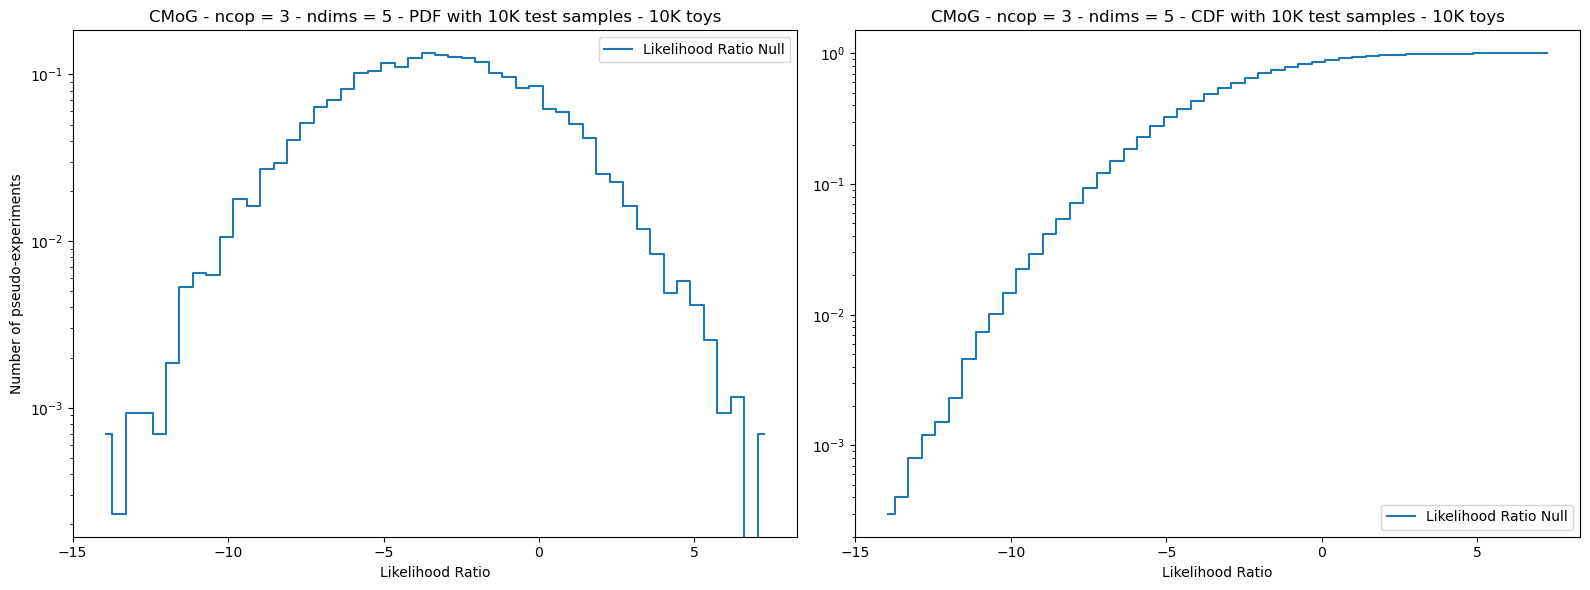

Time elapsed: 0.6806305702775717 seconds.


In [5]:
start = timer()

nsamples = LRMetric.Inputs.batch_size_test
niter = LRMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(-300,-100)
#ax[0].set_ylim(0.00001, 0.02)
ax[0].set_xlabel('Likelihood Ratio')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(-300,-100)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Likelihood Ratio')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [6]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], -1.8054356934517268],
 [0.95, [9500, 500], 1.7269475633248532],
 [0.99, [9900, 100], 3.8596137612172567]]

In [7]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000129
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=False,
                             verbose = True)
LRMetric.Test_tf()
LRMetric.Results[-1].result_value

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.


Setting dist_num from dist_symb.
To run under the null hypothesis, set the `null_test` attribute to True.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 5.614698325283825 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, -26552.47483623,
        -26009.27182095, -26356.5578978 , -26635.53715761, -25999.13544257,
        -26068.22485645, -26277.71193775]),
 'logprob_ref_alt_sum_list': array([-26118.15551017, -26164.3891699 , -26208.1627619 , -26223.00549925,
        -26725.71349401, -26383.65527918, -26948.36073883, -26306.91453948,
        -26428.51429243, -26328.52068525]),
 'logprob_alt_alt_sum_list': array([-26112.45832133, -26164.63551897, -26206.4721818 , -26221.51280242,
        -26722.19821205, -26383.52890402, -26946.81014953, -26306.64045914,
        -26430.02762975, -26328.83684636]),
 'lik_ratio_list': array([11.39437769, -0.49269814,  3.38116019,  2.98539366,  7.03056392,
         0.25275032,  3.10117859,  0.54816066, -3.02667463, -0.63232223]),
 'lik_ratio_norm_list': array([ 0.11394378, -0.00492698,  0.0338116 ,  0.02985394,  0.07030564,
         0.0025275 ,  0.03101179,  0.00548161, -0.03026675, -0.006

In [8]:
np.mean(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)

1.735373687262832

#### LR Test (99% CL) - $\epsilon=0.000172$

In [84]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000172
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [85]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000


LR metric calculation completed in 1547.6844881772995 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, ...,
        -26414.61320193, -26051.01197648, -26070.38371944]),
 'logprob_ref_alt_sum_list': array([-26119.44929672, -26171.75648107, -26213.63406758, ...,
        -26145.33669568, -26199.68479434, -26171.97875077]),
 'logprob_alt_alt_sum_list': array([-26118.72855364, -26179.32370923, -26218.70904769, ...,
        -26146.68662594, -26206.08457696, -26175.97334446]),
 'lik_ratio_list': array([  1.44148615, -15.13445633, -10.14996021, ...,  -2.69986051,
        -12.79956523,  -7.98918738]),
 'lik_ratio_norm_list': array([ 0.01441486, -0.15134456, -0.1014996 , ..., -0.02699861,
        -0.12799565, -0.07989187])}

In [86]:
#LRMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_LR_eps_0000164.json")
LRMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_LR_eps_0000172.json")

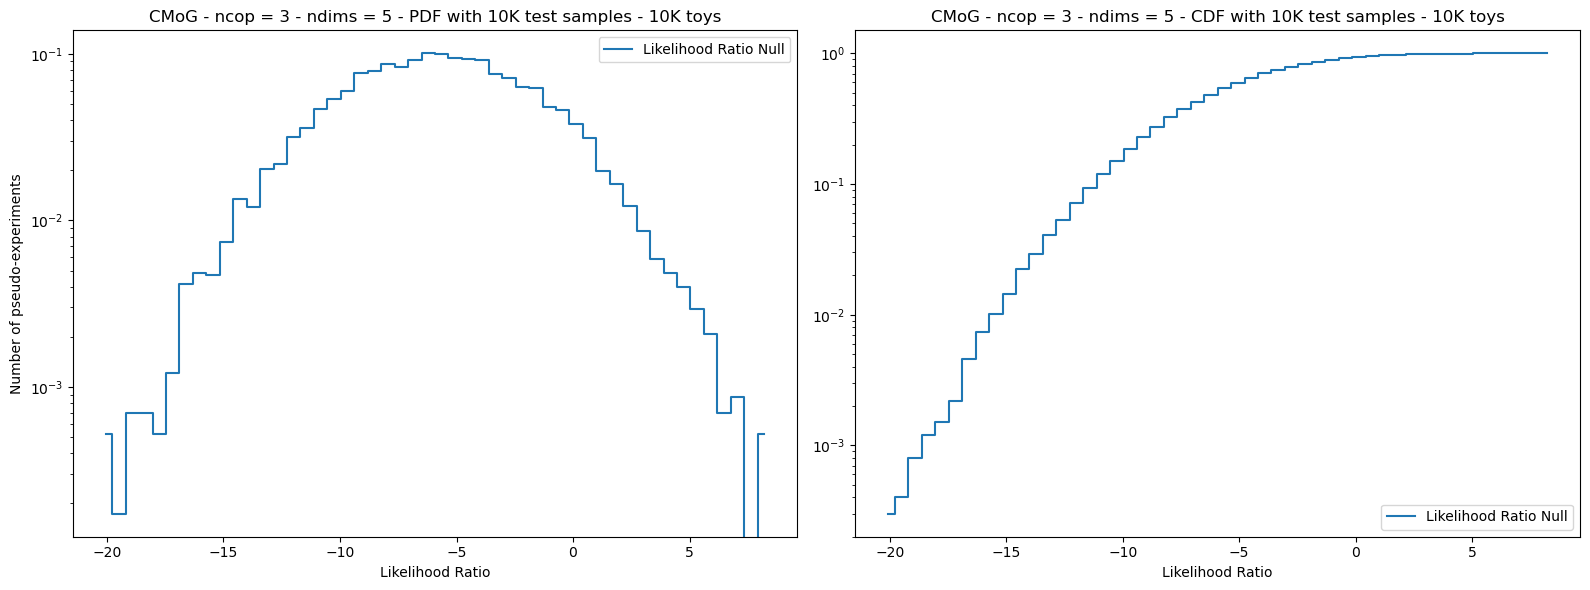

Time elapsed: 0.625993225723505 seconds.


In [87]:
start = timer()

nsamples = LRMetric.Inputs.batch_size_test
niter = LRMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(-300,-100)
#ax[0].set_ylim(0.00001, 0.02)
ax[0].set_xlabel('Likelihood Ratio')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(-300,-100)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Likelihood Ratio')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [88]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], -3.8507828409452776],
 [0.95, [9500, 500], 0.8783876456769724],
 [0.99, [9900, 100], 3.7233201427059117]]

In [89]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000172
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=False,
                             verbose = True)
LRMetric.Test_tf()
LRMetric.Results[-1].result_value

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
To run under the null hypothesis, set the `null_test` attribute to True.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 5.2657355554401875 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, -26552.47483623,
        -26009.27182095, -26356.5578978 , -26635.53715761, -25999.13544257,
        -26068.22485645, -26277.71193775]),
 'logprob_ref_alt_sum_list': array([-26118.7035072 , -26162.96190057, -26207.38137364, -26222.15460491,
        -26725.54300011, -26382.35594709, -26947.5452308 , -26305.66355997,
        -26426.66706172, -26327.07408914]),
 'logprob_alt_alt_sum_list': array([-26110.12648722, -26162.26026668, -26204.08328658, -26219.18406612,
        -26719.89191874, -26381.15906639, -26944.46136136, -26304.25428873,
        -26427.66186975, -26326.47546857]),
 'lik_ratio_list': array([17.15403997,  1.40326777,  6.59617411,  5.94107758, 11.30216274,
         2.39376138,  6.16773888,  2.81854247, -1.98961605,  1.19724114]),
 'lik_ratio_norm_list': array([ 0.1715404 ,  0.01403268,  0.06596174,  0.05941078,  0.11302163,
         0.02393761,  0.06167739,  0.02818542, -0.01989616,  0.011

In [90]:
np.mean(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)

3.7465621462337118

# Fixed $n=100000$

## Null hypotheses

### Model definition

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 1_000,
                                                   batch_size_test = 100_000,
                                                   batch_size_gen = 1000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 100000
niter 1000
niter * batch_size 100000000
small_sample False


In [ ]:
TwoSampleTestInputs.dist_1_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [ ]:
TwoSampleTestInputs.dist_2_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


### FN Test

In [ ]:
FNMetric.Test_tf(max_vectorize = 500)
FNMetric.Results[-1].result_value


------------------------------------------
Starting FN metric calculation...
Running TF FN calculation...
niter = 1000
batch_size = 100000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 2
Iterating from 0 to 500 out of 1000 .
Iterating from 500 to 1000 out of 1000 .
FN metric calculation completed in 60.53157912008464 seconds.


{'metric_list': array([0.01653658, 0.02328025, 0.00861003, 0.01613184, 0.01087034,
        0.02231515, 0.00714418, 0.00893228, 0.02194505, 0.00455615,
        0.00631034, 0.01357107, 0.02822969, 0.02869016, 0.00939945,
        0.01976646, 0.00863126, 0.0144132 , 0.00824386, 0.01817625,
        0.00905525, 0.0295978 , 0.01552439, 0.01792205, 0.0298249 ,
        0.01878269, 0.03069906, 0.02067796, 0.0156176 , 0.00863282,
        0.00965763, 0.00823101, 0.01684671, 0.01120278, 0.01260707,
        0.0115816 , 0.01395425, 0.02219505, 0.01045646, 0.01502414,
        0.01955469, 0.00749113, 0.02173346, 0.02281415, 0.01232686,
        0.01154446, 0.00941182, 0.0295897 , 0.01507111, 0.01490791,
        0.01397536, 0.0098459 , 0.01796976, 0.00670141, 0.00991798,
        0.01679995, 0.01358125, 0.0124747 , 0.01042522, 0.01300145,
        0.00851881, 0.01330485, 0.00733616, 0.00673652, 0.00485235,
        0.01745092, 0.00561234, 0.00890174, 0.00918993, 0.01121898,
        0.01472504, 0.01251036, 0

In [ ]:
FNMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_FN.json")

In [ ]:
FNMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_FN.json")

mu = 2.0403981879634556 +/- 0.00804590250120452
sigma = 0.8969895485012364 +/- 0.008370414472408298


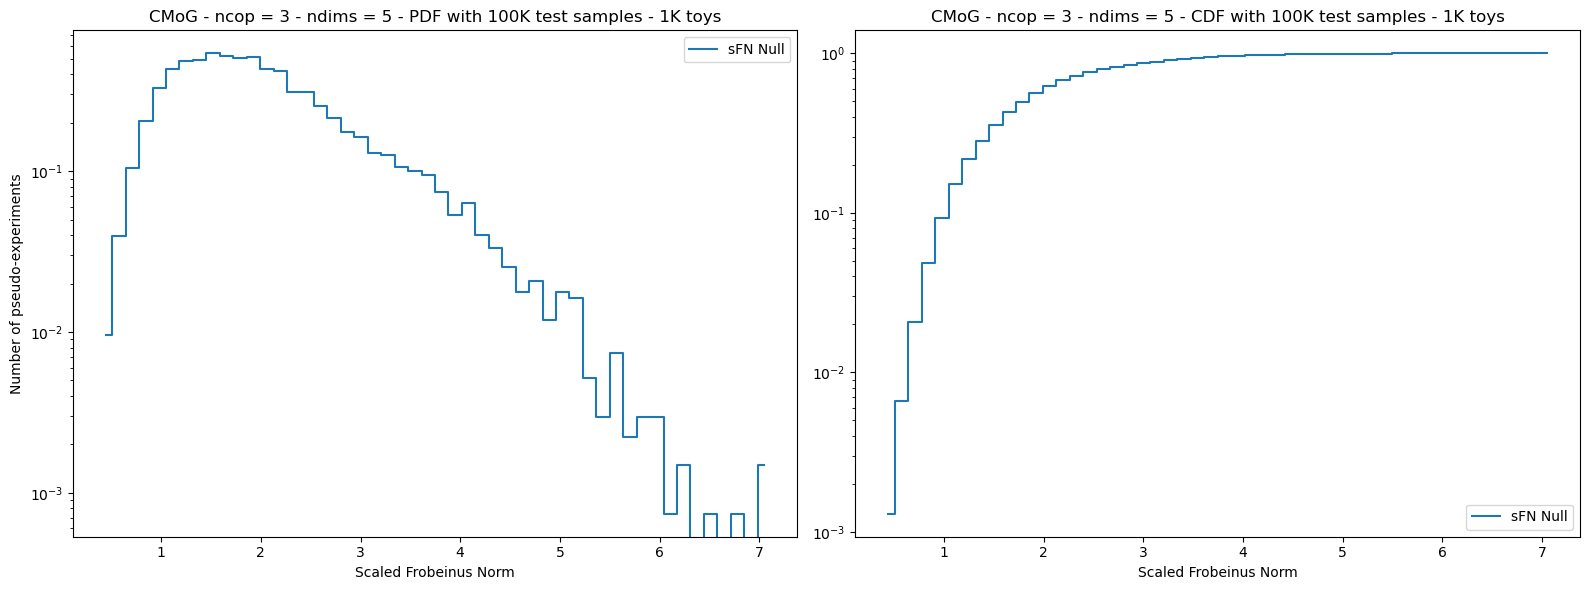

Time elapsed: 0.9044622275978327 seconds.


In [ ]:
start = timer()

nsamples = FNMetric.Inputs.batch_size_test
niter = FNMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(FNMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)/ndims
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='sFN Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005, 0.2)
#ax[0].set_ylim(0.01, 40)
ax[0].set_xlabel('Scaled Frobeinus Norm')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='sFN Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005, 0.2)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Scaled Frobeinus Norm')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
fn_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
fn_thresholds

[[0.68, [6800, 3199], 2.270502934303266],
 [0.95, [9500, 500], 3.800848237657207],
 [0.99, [9900, 100], 4.835772524694957]]

### KS Test

In [ ]:
KSTest.Test_tf(max_vectorize=1000)
KSTest.Results[-1].result_value


------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 1000
batch_size = 100000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 5
Iterating from 0 to 200 out of 1000 .
Iterating from 200 to 400 out of 1000 .
Iterating from 400 to 600 out of 1000 .
Iterating from 600 to 800 out of 1000 .
Iterating from 800 to 1000 out of 1000 .
KS tests calculation completed in 66.78333464823663 seconds.


{'statistic_lists': array([[0.00283003, 0.00747001, 0.00435001, 0.00506002, 0.00600001],
        [0.00340003, 0.00282001, 0.00229   , 0.00305   , 0.00405002],
        [0.00288999, 0.00318   , 0.00275001, 0.00433999, 0.00275004],
        ...,
        [0.00285   , 0.00265002, 0.00202   , 0.00489998, 0.0045    ],
        [0.00400001, 0.00419003, 0.00325996, 0.00457001, 0.00402999],
        [0.00329   , 0.00368999, 0.00426   , 0.00392002, 0.00408995]]),
 'statistic_means': array([0.00514202, 0.00312201, 0.00318201, 0.00393201, 0.00366401,
        0.00366401, 0.003764  , 0.00519001, 0.00430599, 0.00302001,
        0.00335001, 0.00454999, 0.00390801, 0.004366  , 0.003288  ,
        0.00357   , 0.00365801, 0.00355   , 0.004026  , 0.00423601,
        0.00504002, 0.00439201, 0.00482201, 0.00375399, 0.003622  ,
        0.00418801, 0.002798  , 0.00458801, 0.00415   , 0.00358998,
        0.00393401, 0.003072  , 0.00405001, 0.004016  , 0.00404601,
        0.00409202, 0.004432  , 0.00366001, 0.00435

In [ ]:
KSTest.Results.save_to_json(null_hypotheses_dir+"Null_5D_KS.json")

In [ ]:
KSTest.Results.load_from_json(null_hypotheses_dir+"Null_5D_KS.json")

mu = 2.736519041939458 +/- 0.002102628439397225
sigma = 0.4585442660635094 +/- 0.003997324939870239


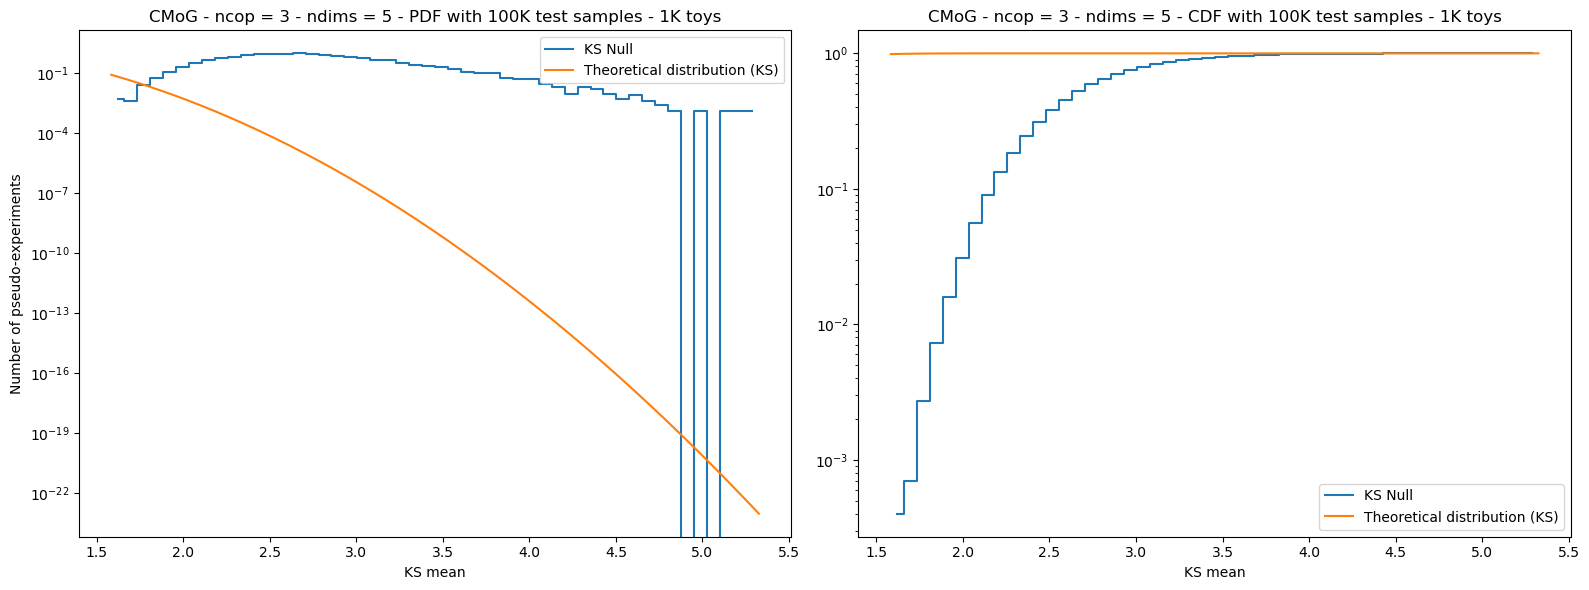

Time elapsed: 1.4692069943994284 seconds.


In [ ]:
start = timer()

nsamples = KSTest.Inputs.batch_size_test
niter = KSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(KSTest.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#shape_fit, loc_fit, scale_fit = lognorm.fit(bin_centers, floc=0)
#empirical_pdf_norm = lognorm.pdf(x, shape_fit, loc_fit, scale_fit)
#empirical_cdf_norm = lognorm.cdf(x, shape_fit, loc_fit, scale_fit)
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('KS mean')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('KS mean')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
ks_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
ks_thresholds

[[0.68, [6800, 3199], 2.8934736283520763],
 [0.95, [9500, 500], 3.577708017631454],
 [0.99, [9900, 100], 4.065173090758402]]

### SKS Test

In [ ]:
#tf.config.run_functions_eagerly(True)#
SKSTest.Test_tf(max_vectorize=20)
SKSTest.Results[-1].result_value


------------------------------------------
Starting SKS metric calculation...
Running TF SKS calculation...
niter = 1000
batch_size = 100000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 50
Iterating from 0 to 20 out of 1000 .


Iterating from 20 to 40 out of 1000 .
Iterating from 40 to 60 out of 1000 .
Iterating from 60 to 80 out of 1000 .
Iterating from 80 to 100 out of 1000 .
Iterating from 100 to 120 out of 1000 .
Iterating from 120 to 140 out of 1000 .
Iterating from 140 to 160 out of 1000 .
Iterating from 160 to 180 out of 1000 .
Iterating from 180 to 200 out of 1000 .
Iterating from 200 to 220 out of 1000 .
Iterating from 220 to 240 out of 1000 .
Iterating from 240 to 260 out of 1000 .
Iterating from 260 to 280 out of 1000 .
Iterating from 280 to 300 out of 1000 .
Iterating from 300 to 320 out of 1000 .
Iterating from 320 to 340 out of 1000 .
Iterating from 340 to 360 out of 1000 .
Iterating from 360 to 380 out of 1000 .
Iterating from 380 to 400 out of 1000 .
Iterating from 400 to 420 out of 1000 .
Iterating from 420 to 440 out of 1000 .
Iterating from 440 to 460 out of 1000 .
Iterating from 460 to 480 out of 1000 .
Iterating from 480 to 500 out of 1000 .
Iterating from 500 to 520 out of 1000 .
Iterati

{'metric_lists': array([[0.00334001, 0.00727999, 0.00703001, ..., 0.00726998, 0.00606   ,
         0.00513999],
        [0.00496   , 0.00347   , 0.00376999, ..., 0.00370002, 0.00411999,
         0.00480002],
        [0.00622001, 0.00399999, 0.00288001, ..., 0.00292003, 0.00448999,
         0.00545   ],
        ...,
        [0.00316   , 0.00231004, 0.00422001, ..., 0.00281   , 0.00455999,
         0.00225002],
        [0.00445998, 0.00319   , 0.00445002, ..., 0.00237   , 0.00474   ,
         0.00668001],
        [0.00492001, 0.00687   , 0.00779   , ..., 0.00782999, 0.00616002,
         0.00770998]]),
 'metric_means': array([0.00473171, 0.0039742 , 0.0038303 , 0.00413331, 0.003546  ,
        0.0039954 , 0.00304251, 0.0031634 , 0.0035589 , 0.00311461,
        0.003815  , 0.00384981, 0.0039013 , 0.00411971, 0.00417971,
        0.00396141, 0.00436711, 0.00368471, 0.00308801, 0.0037564 ,
        0.0032012 , 0.00390741, 0.0035652 , 0.00458861, 0.00333391,
        0.0039789 , 0.0037007 , 0.003

In [ ]:
SKSTest.Results.save_to_json(null_hypotheses_dir+"Null_5D_SKS.json")

In [ ]:
SKSTest.Results.load_from_json(null_hypotheses_dir+"Null_5D_SKS.json")

mu = 2.739620450889748 +/- 0.0017598540971442258
sigma = 0.4195061497933285 +/- 0.0038082249812746104


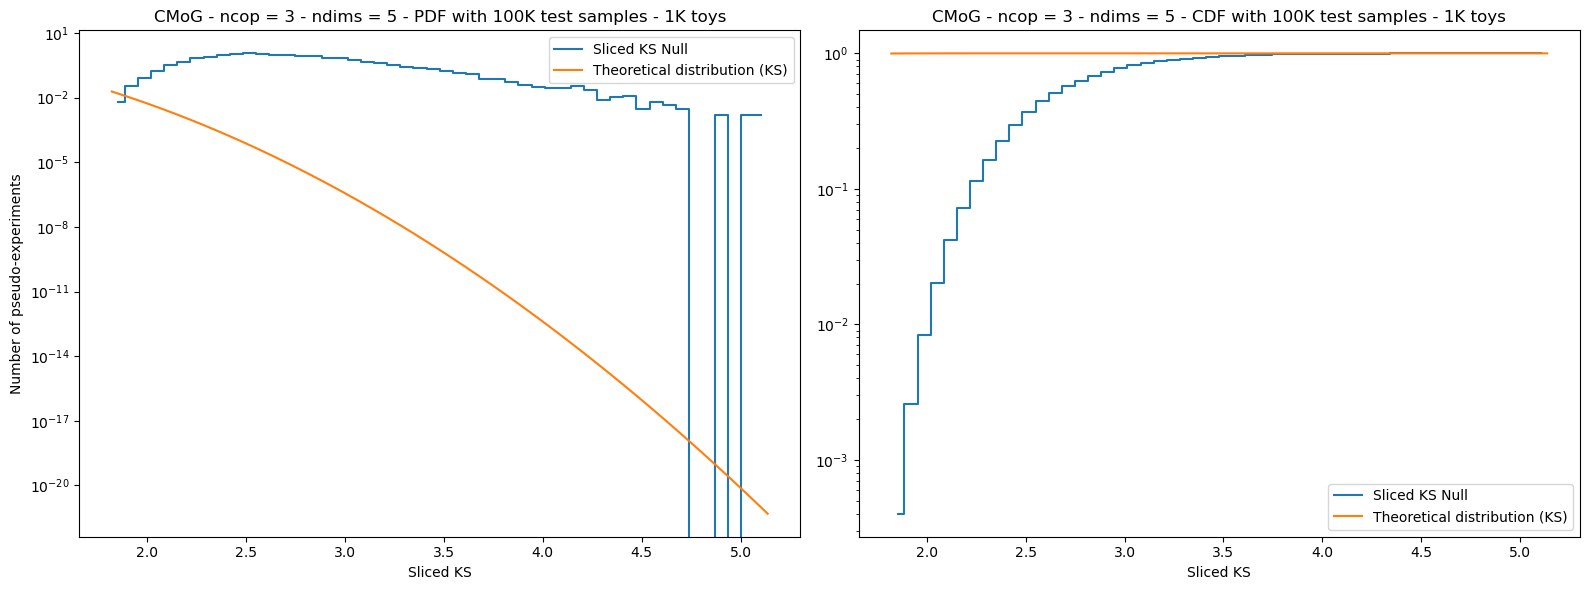

Time elapsed: 1.2357393745332956 seconds.


In [ ]:
start = timer()

nsamples = SKSTest.Inputs.batch_size_test
niter = SKSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(SKSTest.Results[-1].result_value["metric_means"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Sliced KS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 4)
ax[0].set_xlabel('Sliced KS')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Sliced KS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Sliced KS')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
sks_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
sks_thresholds

[[0.68, [6800, 3199], 2.8760320195456437],
 [0.95, [9500, 500], 3.519572181577482],
 [0.99, [9900, 100], 4.029395397493914]]

### SWD Test

In [ ]:
SWDMetric.Test_tf(max_vectorize=100)
SWDMetric.Results[-1].result_value


------------------------------------------
Starting SWD metric calculation...
Running TF SWD calculation...
niter = 1000
batch_size = 100000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 10
Iterating from 0 to 100 out of 1000 .
Iterating from 100 to 200 out of 1000 .
Iterating from 200 to 300 out of 1000 .
Iterating from 300 to 400 out of 1000 .
Iterating from 400 to 500 out of 1000 .
Iterating from 500 to 600 out of 1000 .
Iterating from 600 to 700 out of 1000 .
Iterating from 700 to 800 out of 1000 .
Iterating from 800 to 900 out of 1000 .
Iterating from 900 to 1000 out of 1000 .
SWD metric calculation completed in 142.20928873308003 seconds.


{'metric_lists': array([[0.0055455 , 0.00605544, 0.00309382, ..., 0.0053953 , 0.00517445,
         0.00679499],
        [0.00455791, 0.00547601, 0.00539397, ..., 0.00634283, 0.00705638,
         0.00538655],
        [0.00665129, 0.00598698, 0.00584313, ..., 0.00455608, 0.00694719,
         0.00557499],
        ...,
        [0.00689652, 0.00299982, 0.00347891, ..., 0.00325553, 0.01058677,
         0.00429074],
        [0.00649698, 0.00778986, 0.0052194 , ..., 0.00460151, 0.00416956,
         0.00563185],
        [0.00457079, 0.00371021, 0.00537506, ..., 0.00394693, 0.00847137,
         0.00577173]]),
 'metric_means': array([0.005127  , 0.00508106, 0.00558793, 0.00510129, 0.00657872,
        0.00566876, 0.00747275, 0.00774897, 0.00673618, 0.00478796,
        0.00521594, 0.00692487, 0.0062293 , 0.00752008, 0.00454823,
        0.00508239, 0.00487357, 0.00489169, 0.00523776, 0.00470628,
        0.0091546 , 0.01010595, 0.00438218, 0.00495659, 0.0076542 ,
        0.00631929, 0.00619085, 0.007

In [ ]:
SWDMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_SWD.json")

In [ ]:
SWDMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_SWD.json")

mu = 2.0030075900760207 +/- 0.0033453395563586862
sigma = 0.5783891040085979 +/- 0.00557447767860787


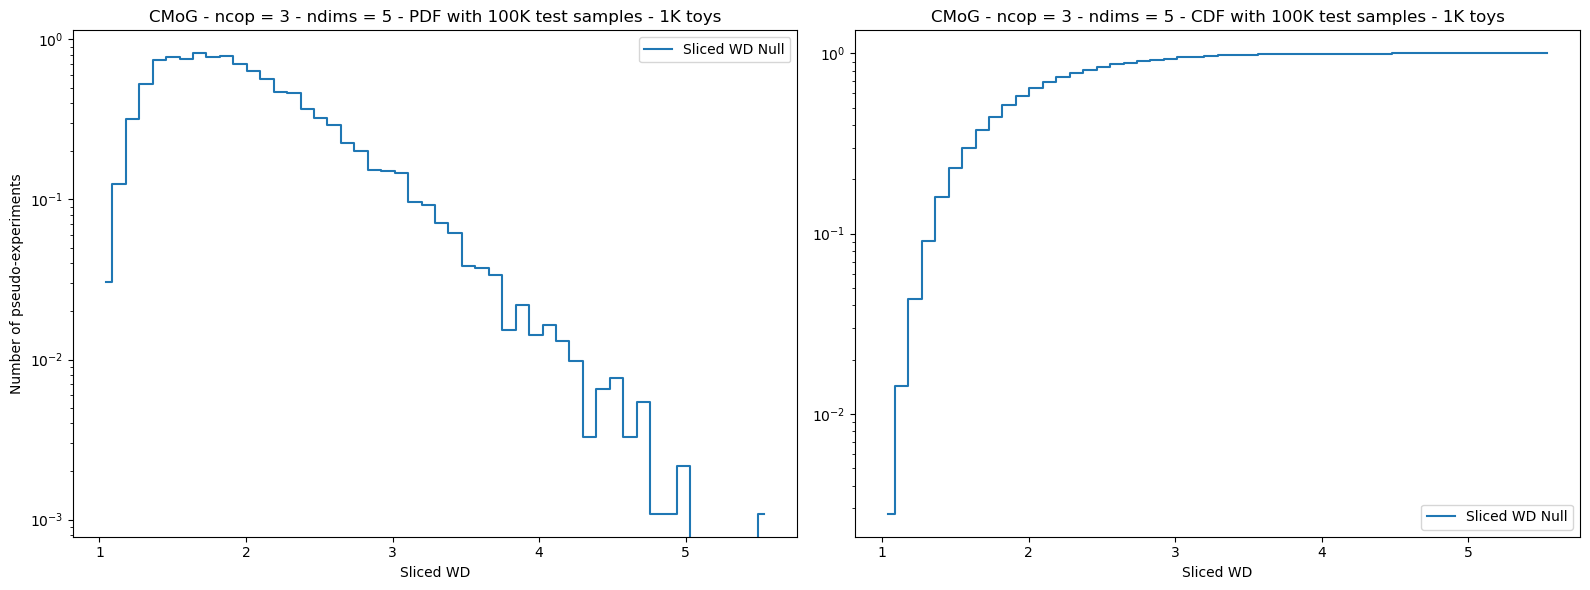

Time elapsed: 0.7931137066334486 seconds.


In [ ]:
start = timer()

nsamples = SWDMetric.Inputs.batch_size_test
niter = SWDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(SWDMetric.Results[-1].result_value["metric_means"])*np.sqrt(ns/ndims)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Sliced WD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.008*np.sqrt(ns), 0.055*np.sqrt(ns))
#ax[0].set_ylim(0.01, 1.8)
ax[0].set_xlabel('Sliced WD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Sliced WD Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[0].set_xlim(0.008*np.sqrt(ns), 0.055*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Sliced WD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
swd_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
swd_thresholds

[[0.68, [6800, 3199], 2.1651010402883517],
 [0.95, [9500, 500], 3.1149933682707953],
 [0.99, [9900, 100], 3.832051529716596]]

### FPD Test (Numpy vs TensorFlow)

In [ ]:
FPDMetric.Test_tf(max_vectorize=200)
#FPDMetric.Test_tf(max_vectorize=100)
FPDMetric.Results[-1].result_value


------------------------------------------
Starting FPD metric calculation...
Running TF FPD calculation...
niter = 1000
batch_size = 100000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 5
Iterating from 0 to 200 out of 1000 .
Iterating from 200 to 400 out of 1000 .
Iterating from 400 to 600 out of 1000 .
Iterating from 600 to 800 out of 1000 .
Iterating from 800 to 1000 out of 1000 .
FPD metric calculation completed in 207.8688984196633 seconds.


{'metric_list': array([4.16114197e-05, 3.97100352e-05, 3.96167482e-05, 3.91025092e-05,
        3.91080293e-05, 3.84682742e-05, 3.92932844e-05, 4.04090408e-05,
        4.26686387e-05, 3.88400406e-05, 3.88553148e-05, 4.19579744e-05,
        3.97302344e-05, 4.24568860e-05, 4.08941628e-05, 3.89992390e-05,
        4.04653806e-05, 3.90857940e-05, 3.98291695e-05, 3.99937668e-05,
        4.44687968e-05, 3.95102164e-05, 3.90449720e-05, 3.97221690e-05,
        4.11384118e-05, 4.14212853e-05, 3.83616475e-05, 4.06964740e-05,
        4.02757788e-05, 4.05774893e-05, 3.96609398e-05, 4.09421006e-05,
        3.92410634e-05, 4.14058328e-05, 4.30670298e-05, 4.15174368e-05,
        4.10345320e-05, 3.92183197e-05, 4.05528563e-05, 3.92534894e-05,
        3.83630764e-05, 4.00853376e-05, 3.91451529e-05, 4.27930908e-05,
        3.84292136e-05, 4.01870730e-05, 4.06478769e-05, 4.00524298e-05,
        3.91578530e-05, 5.73760931e-05, 3.84281299e-05, 4.12262464e-05,
        3.83413858e-05, 4.07293795e-05, 3.8188346

In [ ]:
FPDMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_FPD.json")

In [ ]:
FPDMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_FPD.json")

mu = 71.95566779700273 +/- 10.743932197495063
sigma = 32.77793800332025 +/- 0.5924833921037982


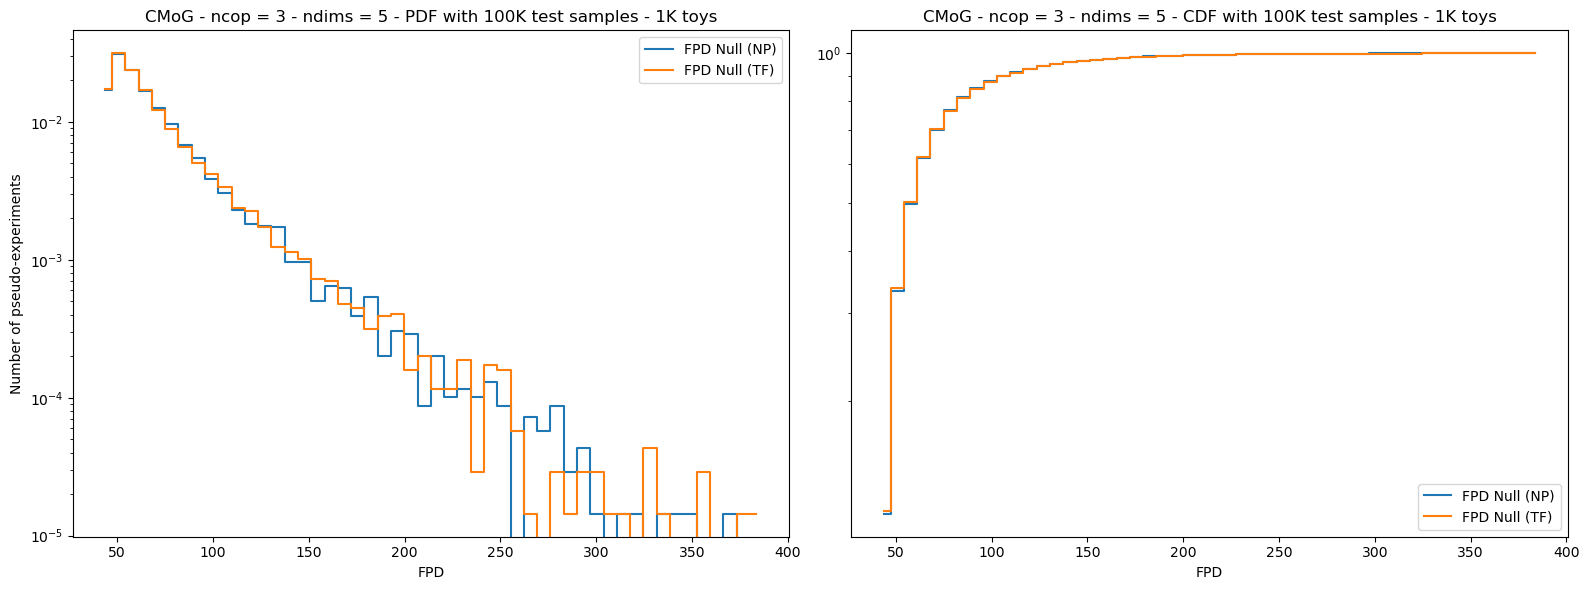

Time elapsed: 0.5590552613139153 seconds.


In [ ]:
start = timer()

nsamples = FPDMetric.Inputs.batch_size_test
niter = FPDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null_np = np.array(FPDMetric.Results[0].result_value["metric_list"])*(ns/ndims)**(3/2)
dist_null_tf = np.array(FPDMetric.Results[1].result_value["metric_list"])*(ns/ndims)**(3/2)
# Compute the mean and standard deviation of the sample and their standard errors
mu_np, deltamu_np, sigma_np, deltasigma_np = (np.mean(dist_null_np), se_mean(dist_null_np), np.std(dist_null_np), se_std(dist_null_np))
mu_tf, deltamu_tf, sigma_tf, deltasigma_tf = (np.mean(dist_null_tf), se_mean(dist_null_tf), np.std(dist_null_tf), se_std(dist_null_tf))
print("mu =", mu_tf, "+/-", deltamu_tf)
print("sigma =", sigma_tf, "+/-", deltasigma_tf)
# Minimum and maximum x values
min_x = min(dist_null_tf) # lower limit of the binning
max_x = max(dist_null_tf) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts_np, bin_edges_np = np.histogram(dist_null_np, bins=x, density=True)
cum_counts_np = np.cumsum(counts_np)/np.sum(counts_np)
counts_tf, bin_edges_tf = np.histogram(dist_null_tf, bins=x, density=True)
cum_counts_tf = np.cumsum(counts_tf)/np.sum(counts_tf)
# Get the bin centers
bin_centers_np = (bin_edges_np[:-1] + bin_edges_np[1:]) / 2
bin_centers_tf = (bin_edges_tf[:-1] + bin_edges_tf[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers_np, counts_np, linestyle = '-', label='FPD Null (NP)', drawstyle='steps-mid')
ax[0].plot(bin_centers_tf, counts_tf, linestyle = '-', label='FPD Null (TF)', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('FPD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers_np, cum_counts_np, linestyle = '-', label='FPD Null (NP)', drawstyle='steps-mid')
ax[1].plot(bin_centers_tf, cum_counts_tf, linestyle = '-', label='FPD Null (TF)', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('FPD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

mu = 40.55284602419237 +/- 0.18578160292934456
sigma = 2.4238255147880152 +/- 0.16266171673491048


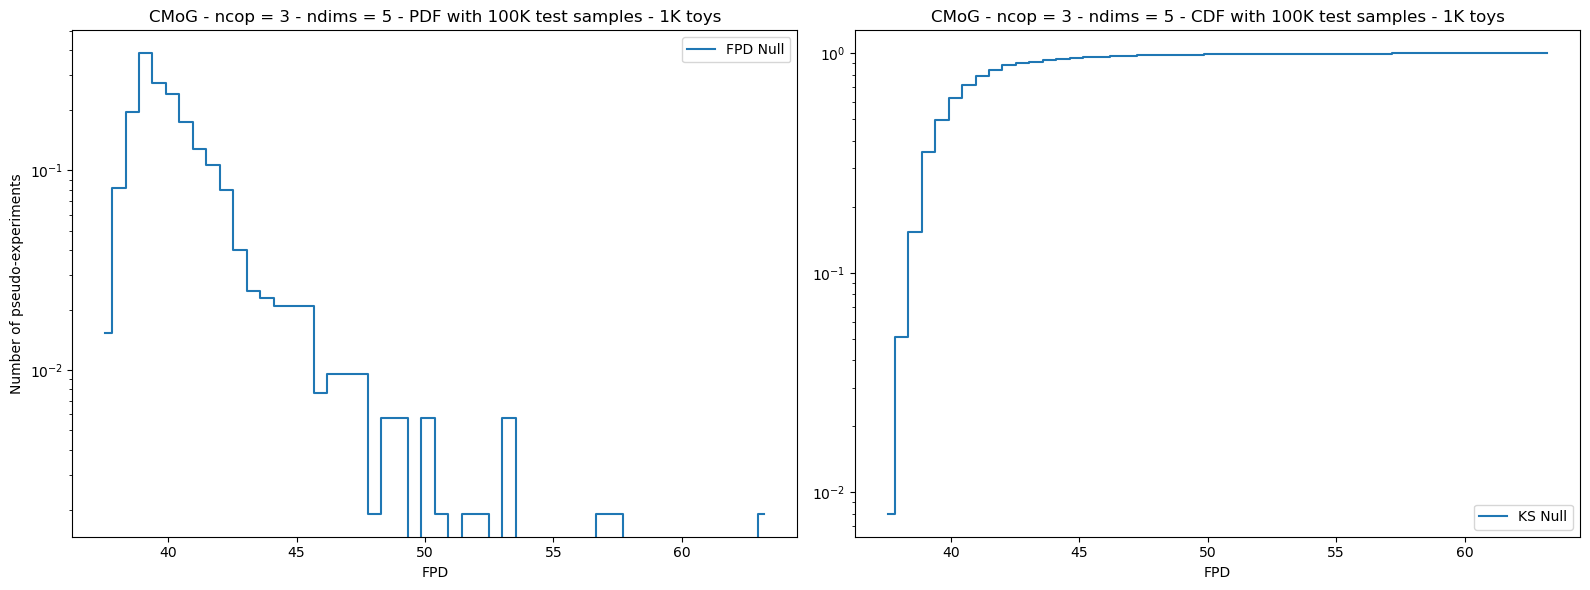

Time elapsed: 0.7945175394415855 seconds.


In [ ]:
start = timer()

nsamples = FPDMetric.Inputs.batch_size_test
niter = FPDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(FPDMetric.Results[-1].result_value["metric_list"])*(ns/ndims)**(3/2)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='FPD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('FPD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('FPD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
fpd_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
fpd_thresholds

[[0.68, [6800, 3199], 2.1651010402883517],
 [0.95, [9500, 500], 3.1149933682707953],
 [0.99, [9900, 100], 3.832051529716596]]

### KPD Test

In [ ]:
KPDMetric.Test_tf(max_vectorize=1)
KPDMetric.Results[-1].result_value


------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 1000
batch_size = 100000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 1000
Iterating from 0 to 1 out of 1000 .
Iterating from 1 to 2 out of 1000 .
Iterating from 2 to 3 out of 1000 .
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/util/deprecation.py", line 648, in new_func
    return func(*args, **kwargs)  File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2574, in while_loop_v2
    return while_loop(  File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/pytho

{'metric_list': array([-4.33674619e-05, -5.28965850e-05,  1.10060334e-05, -2.11591674e-05,
        -4.66047094e-05,  1.73156503e-05, -4.07773360e-05, -3.72351071e-05,
        -1.31256672e-05, -6.00872340e-05, -4.07500217e-05,  1.78018654e-05,
         1.82535438e-06, -3.94341348e-05, -9.45791354e-06, -3.75479625e-05,
        -3.39838497e-05, -2.42414570e-05,  5.40688829e-05, -1.99735527e-05,
        -4.34610502e-05, -4.90732267e-05,  1.77701541e-06, -2.32692026e-05,
        -6.11932815e-05, -2.62856705e-06, -4.52569234e-05, -5.51489730e-06,
        -4.74517523e-05,  1.07501009e-05,  1.47093621e-05, -4.70440254e-05,
        -3.25043544e-05, -6.53499361e-05, -5.52225398e-05,  3.93452905e-05,
        -2.92150301e-05, -7.67794255e-06, -2.27488777e-05, -1.30847766e-05,
         1.13095326e-05, -5.19980895e-05, -4.08258191e-05, -7.41994639e-05,
        -3.52448456e-05, -2.99110805e-05, -5.69377245e-05, -1.27574239e-05,
        -6.04462749e-05, -4.01318094e-05, -1.93763130e-05, -1.64299866e-0

In [ ]:
KPDMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_KPD.json")

In [ ]:
KPDMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_KPD.json")

mu = 0.2847379976713676 +/- 0.020773948169699737
sigma = 1.4413170424892554 +/- 0.021606168872219087


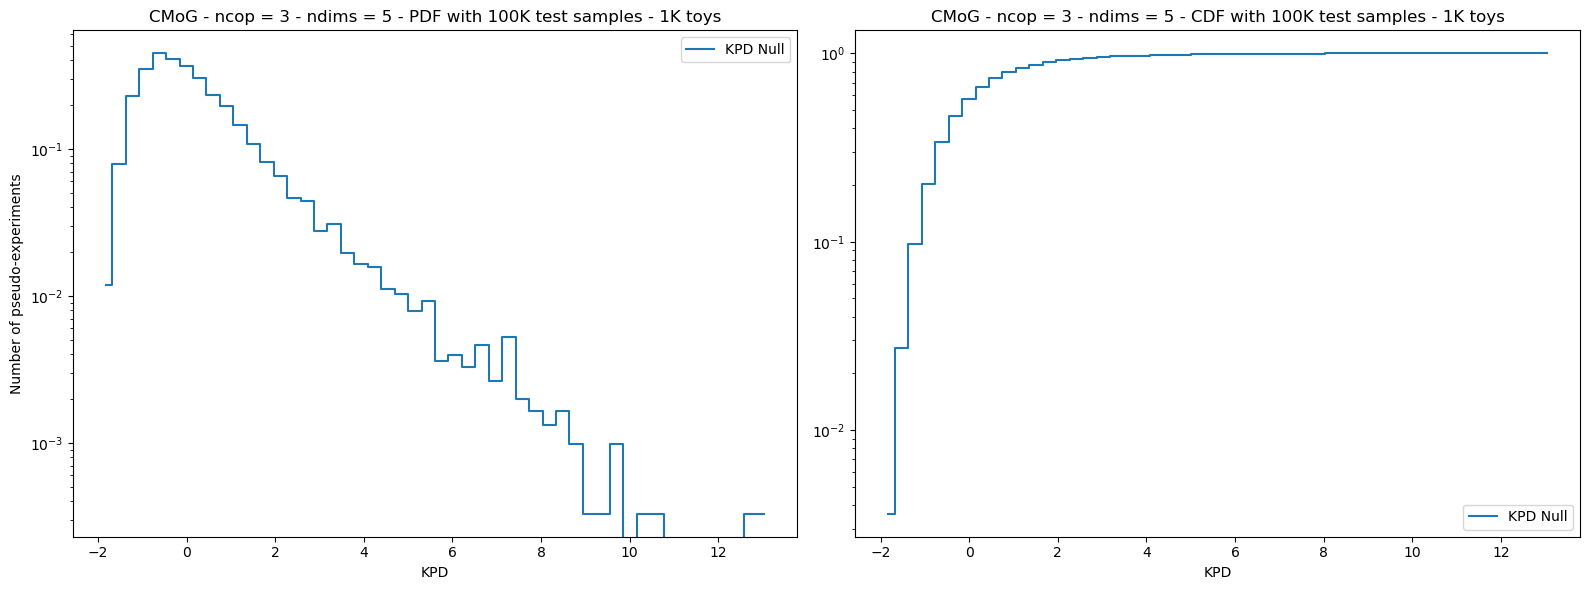

Time elapsed: 0.8527054339647293 seconds.


In [ ]:
start = timer()

nsamples = KPDMetric.Inputs.batch_size_test
niter = KPDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(KPDMetric.Results[-1].result_value["metric_list"])*ns/np.sqrt(ndims)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='KPD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='KPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('KPD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KPD Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='KPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('KPD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
kpd_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
kpd_thresholds

[[0.68, [6800, 3199], 0.5022264825200567],
 [0.95, [9500, 500], 3.0746255888564704],
 [0.99, [9900, 100], 5.753294046664446]]

## Alternative hypotheses and results

### Shift means

#### Thresholds

In [ ]:
fn_thresholds = fn_thresholds[1:]
fpd_thresholds = fpd_thresholds[1:]
kpd_thresholds = kpd_thresholds[1:]
ks_thresholds = ks_thresholds[1:]
sks_thresholds = sks_thresholds[1:]
swd_thresholds = swd_thresholds[1:]

In [ ]:
print(f"fn_thresholds: {fn_thresholds}")
print(f"fpd_thresholds: {fpd_thresholds}")
print(f"kpd_thresholds: {kpd_thresholds}")
print(f"ks_thresholds: {ks_thresholds}")
print(f"sks_thresholds: {sks_thresholds}")
print(f"swd_thresholds: {swd_thresholds}")

fn_thresholds: [[0.95, [950, 50], 1.2365268905752], [0.99, [990, 10], 1.4684991255333162]]
fpd_thresholds: [[0.95, [950, 50], 45.09527678297439], [0.99, [990, 10], 50.271573973192034]]
kpd_thresholds: [[0.95, [950, 50], 0.5113814932343488], [0.99, [990, 10], 1.3044753512548064]]
ks_thresholds: [[0.95, [950, 50], 1.1381595409713376], [0.99, [990, 10], 1.3528197029565723]]
sks_thresholds: [[0.95, [950, 50], 1.0992073254638377], [0.99, [990, 10], 1.2521102453513773]]
swd_thresholds: [[0.95, [950, 50], 0.9747483375186353], [0.99, [990, 10], 1.1664085018754888]]


#### Scan and exclusion limits

In [ ]:
niter = 1_000
nsamples = 10_000
ns = nsamples**2 /(2*nsamples)

fn_list = []
fpd_list = []
kpd_list = []
ks_list = []
#multi_ks_list = []
sks_list = []
swd_list = []
exclusion_list = []

fn_threshold_number = 0
fpd_threshold_number = 0
kpd_threshold_number = 0
ks_threshold_number = 0
#multi_ks_threshold_number = 0
sks_threshold_number = 0
swd_threshold_number = 0

start = timer()  
for i in range(500):
    seed = 0
    ncomp = 3
    ndims = 5
    delta = 0.0001
    eps = 0+i*delta
    print("\n------------------")
    print(f"eps = {eps}")
    eps_loc = 10*eps
    eps_scale = eps
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
    dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)

    TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                       dist_2_input = dist_2,
                                                       niter = 10,
                                                       batch_size_test = 100_000,
                                                       batch_size_gen = 1000,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = False)

    FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             verbose = False)
    FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = False,
                               verbose = False)
    KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                                 progress_bar = False,
                                 verbose = False)
    KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                             verbose = False)
    #MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
    #                                   verbose = False)
    SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               verbose = False)
    SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                                   nslices = 100,
                                   seed_slicing = 0,
                                   verbose = False)

    if fn_threshold_number < len(fn_thresholds):
        FNMetric.Test_tf(max_vectorize = 1000)
        fn = np.mean(FNMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)/ndims
        fn_list.append(fn)
        print(f"fn statistic = {fn}\t-\t next threshold = {fn_thresholds[fn_threshold_number][2]} at {fn_thresholds[fn_threshold_number][0]} CL")
        fn_threshold = fn_thresholds[fn_threshold_number]
        if fn > fn_threshold[2]:
            end = timer()
            print(f"=======> fn excluded at {fn_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fn statistic", fn, fn_threshold[0]])
            fn_threshold_number += 1
            
    if fpd_threshold_number < len(fpd_thresholds):
        FPDMetric.Test_tf(max_vectorize=400)
        fpd = np.mean(FPDMetric.Results[-1].result_value["metric_list"])*(ns/ndims)**(3/2)
        fpd_list.append(fpd)
        print(f"fpd statistic = {fpd}\t-\t next threshold = {fpd_thresholds[fpd_threshold_number][2]} at {fpd_thresholds[fpd_threshold_number][0]} CL")
        fpd_threshold = fpd_thresholds[fpd_threshold_number]
        if fpd > fpd_threshold[2]:
            end = timer()
            print(f"=======> fpd excluded at {fpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fpd statistic", fpd, fpd_threshold[0]])
            fpd_threshold_number += 1
            
    if kpd_threshold_number < len(kpd_thresholds):
        KPDMetric.Test_tf(max_vectorize=2)
        kpd = np.mean(KPDMetric.Results[-1].result_value["metric_list"])*ns/np.sqrt(ndims)
        kpd_list.append(kpd)
        print(f"kpd statistic = {kpd}\t-\t next threshold = {kpd_thresholds[kpd_threshold_number][2]} at {kpd_thresholds[kpd_threshold_number][0]} CL")
        kpd_threshold = kpd_thresholds[kpd_threshold_number]
        if kpd > kpd_threshold[2]:
            end = timer()
            print(f"=======> kpd excluded at {kpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "kpd statistic", kpd, kpd_threshold[0]])
            kpd_threshold_number += 1

    if ks_threshold_number < len(ks_thresholds):
        KSTest.Test_tf(max_vectorize=1000)
        ks = np.mean(KSTest.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
        ks_list.append(ks)
        print(f"ks statistic = {ks}\t-\t next threshold = {ks_thresholds[ks_threshold_number][2]} at {ks_thresholds[ks_threshold_number][0]} CL")
        ks_threshold = ks_thresholds[ks_threshold_number]
        if ks > ks_threshold[2]:
            end = timer()
            print(f"=======> ks excluded at {ks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "ks statistic", ks, ks_threshold[0]])
            ks_threshold_number += 1
            
    #if multi_ks_threshold_number < len(multi_ks_thresholds):
    #    MultiKSTest.Test_tf()
    #    multi_ks = np.mean(MultiKSTest.Results[-1].result_value["metric_list"])*np.sqrt(ns)
    #    multi_ks_list.append(multi_ks)
    #    print(f"multi ks statistic = {multi_ks}\t-\t next threshold = {multi_ks_thresholds[multi_ks_threshold_number][2]} at {multi_ks_thresholds[multi_ks_threshold_number][0]} CL")
    #    multi_ks_threshold = multi_ks_thresholds[multi_ks_threshold_number]
    #    if multi_ks > multi_ks_threshold[2]:
    #        end = timer()
    #        print(f"=======> multi ks excluded at {multi_ks_threshold[0]} CL in {end-start} seconds")
    #        exclusion_list.append([eps, "multi ks statistic", multi_ks, multi_ks_threshold[0]])
    #        multi_ks_threshold_number += 1
            
    if sks_threshold_number < len(sks_thresholds):
        SKSTest.Test_tf(max_vectorize=1000)
        sks = np.mean(SKSTest.Results[-1].result_value["metric_means"])*np.sqrt(ns)
        sks_list.append(sks)
        print(f"sks statistic = {sks}\t-\t next threshold = {sks_thresholds[sks_threshold_number][2]} at {sks_thresholds[sks_threshold_number][0]} CL")
        sks_threshold = sks_thresholds[sks_threshold_number]
        if sks > sks_threshold[2]:
            end = timer()
            print(f"=======> sks excluded at {sks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "sks statistic", sks, sks_threshold[0]])
            sks_threshold_number += 1
            
    if swd_threshold_number < len(swd_thresholds):
        SWDMetric.Test_tf(max_vectorize=1000)
        swd = np.mean(SWDMetric.Results[-1].result_value["metric_means"])*np.sqrt(ns/ndims)
        swd_list.append(swd)
        print(f"swd statistic = {swd}\t-\t next threshold = {swd_thresholds[swd_threshold_number][2]} at {swd_thresholds[swd_threshold_number][0]} CL")
        swd_threshold = swd_thresholds[swd_threshold_number]
        if swd > swd_threshold[2]:
            end = timer()
            print(f"=======> swd excluded at {swd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "swd statistic", swd, swd_threshold[0]])
            swd_threshold_number += 1
            
    #if fn_threshold_number >= len(fn_thresholds) and fpd_threshold_number >= len(fpd_thresholds) and kpd_threshold_number >= len(kpd_thresholds) and ks_threshold_number >= len(ks_thresholds) and multi_ks_threshold_number >= len(multi_ks_thresholds) and sks_threshold_number >= len(sks_thresholds) and swd_threshold_number >= len(swd_thresholds):
    if fn_threshold_number >= len(fn_thresholds) and fpd_threshold_number >= len(fpd_thresholds) and kpd_threshold_number >= len(kpd_thresholds) and ks_threshold_number >= len(ks_thresholds) and sks_threshold_number >= len(sks_thresholds) and swd_threshold_number >= len(swd_thresholds):
        break
                        
end = timer()
print("Time elapsed:", end-start, "seconds.")


------------------
eps = 0.0
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 0.598196053283708	-	 next threshold = 1.2365268905752 at 0.95 CL
fpd statistic = 39.966326032964936	-	 next threshold = 45.09527678297439 at 0.95 CL
kpd statistic = -0.5515261106260152	-	 next threshold = 0.5113814932343488 at 0.95 CL
ks statistic = 0.8491697351567128	-	 next threshold = 1.1381595409713376 at 0.95 CL
sks statistic = 0.8557509388905462	-	 next threshold = 1.0992073254638377 at 0.95 CL
swd statistic = 0.5858245207476112	-	 next threshold = 0.9747483375186353 at 0.95 CL

------------------
eps = 0.0001
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 0.583483946108059	-	 next threshold = 1.2365268905752 at 0.95 CL
fpd statistic = 39.975581328907694	-	 next threshold = 45.09527678297439 at 0.95 CL
kpd statistic = -0.5452509834419949	-	 next t

#### Results show and save

In [ ]:
print(f"fn_thresholds: {fn_thresholds}")
print(f"fpd_thresholds: {fpd_thresholds}")
print(f"kpd_thresholds: {kpd_thresholds}")
print(f"ks_thresholds: {ks_thresholds}")
print(f"multi_ks_thresholds: {multi_ks_thresholds}")
print(f"sks_thresholds: {sks_thresholds}")
print(f"swd_thresholds: {swd_thresholds}")

fn_thresholds: [[0.95, [9500, 500], 1.201933747163374], [0.99, [9900, 100], 1.5292055424498905]]
fpd_thresholds: [[0.95, [9500, 500], 4.329877652456557], [0.99, [9900, 100], 6.352959846557846]]
kpd_thresholds: [[0.95, [9500, 500], 0.30746255888564705], [0.99, [9900, 100], 0.5753294046664447]]
ks_thresholds: [[0.95, [9500, 500], 1.1313706138761246], [0.99, [9900, 100], 1.2855206049622938]]
multi_ks_thresholds: [[0.95, [9500, 500], 1.4566393387274343], [0.99, [9900, 100], 1.668772856652466]]
sks_thresholds: [[0.95, [9500, 500], 1.112986448315256], [0.99, [9900, 100], 1.2742067049480295]]
swd_thresholds: [[0.95, [9500, 500], 2.202632934055404], [0.99, [9900, 100], 2.709669622518888]]


In [ ]:
exclusion_list

NameError: name 'exclusion_list' is not defined

In [ ]:
exclusion_list_dict = {"5D": exclusion_list}

In [ ]:
with open(null_hypotheses_dir+"exclusion_list.json", "w") as outfile:
    json.dump(exclusion_list_dict, outfile)

In [ ]:
with open(null_hypotheses_dir+"exclusion_list.json", "r") as infile:
    exclusion_list_dict = json.load(infile)

In [ ]:
exclusion_list_dict

{'5D': [[0.001, 'ks statistic', 1.150887381160314, 0.95],
  [0.0012000000000000001, 'multi ks statistic', 1.530886280735438, 0.95],
  [0.0014, 'ks statistic', 1.3180470296371594, 0.99],
  [0.0014, 'multi ks statistic', 1.7239264333480646, 0.99],
  [0.0028, 'sks statistic', 1.1180563783334174, 0.95],
  [0.0038, 'sks statistic', 1.2864044770591279, 0.99],
  [0.0056, 'fn statistic', 1.211483576862899, 0.95],
  [0.0071, 'fpd statistic', 4.362107332247842, 0.95],
  [0.0079, 'fn statistic', 1.536376470735762, 0.99],
  [0.008400000000000001, 'kpd statistic', 0.3087719336084374, 0.95],
  [0.0097, 'fpd statistic', 6.420883800476466, 0.99],
  [0.0117, 'kpd statistic', 0.5851484911513134, 0.99],
  [0.0143, 'swd statistic', 2.2122717982708178, 0.95],
  [0.018000000000000002, 'swd statistic', 2.717441299061513, 0.99]],
 '20D': [[0.0009000000000000001, 'ks statistic', 1.18069179640513, 0.95],
  [0.0013000000000000002, 'ks statistic', 1.4118451834412984, 0.99],
  [0.0028, 'fn statistic', 1.2218990783

#### LR Test (95% CL) - $\epsilon=$

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000129
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000
LR metric calculation completed in 1648.533557456918 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, ...,
        -26414.61320193, -26051.01197648, -26070.38371944]),
 'logprob_ref_alt_sum_list': array([-26119.44929672, -26171.75648107, -26213.63406758, ...,
        -26145.33669568, -26199.68479434, -26171.97875077]),
 'logprob_alt_alt_sum_list': array([-26118.16856901, -26176.65122606, -26216.65046218, ...,
        -26145.60348555, -26203.71388187, -26174.22928749]),
 'lik_ratio_list': array([ 2.56145542, -9.78948998, -6.0327892 , ..., -0.53357974,
        -8.05817506, -4.50107345]),
 'lik_ratio_norm_list': array([ 0.02561455, -0.0978949 , -0.06032789, ..., -0.0053358 ,
        -0.08058175, -0.04501073])}

In [ ]:
#LRMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_LR_eps_000011.json")
LRMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_LR_eps_0000129.json")

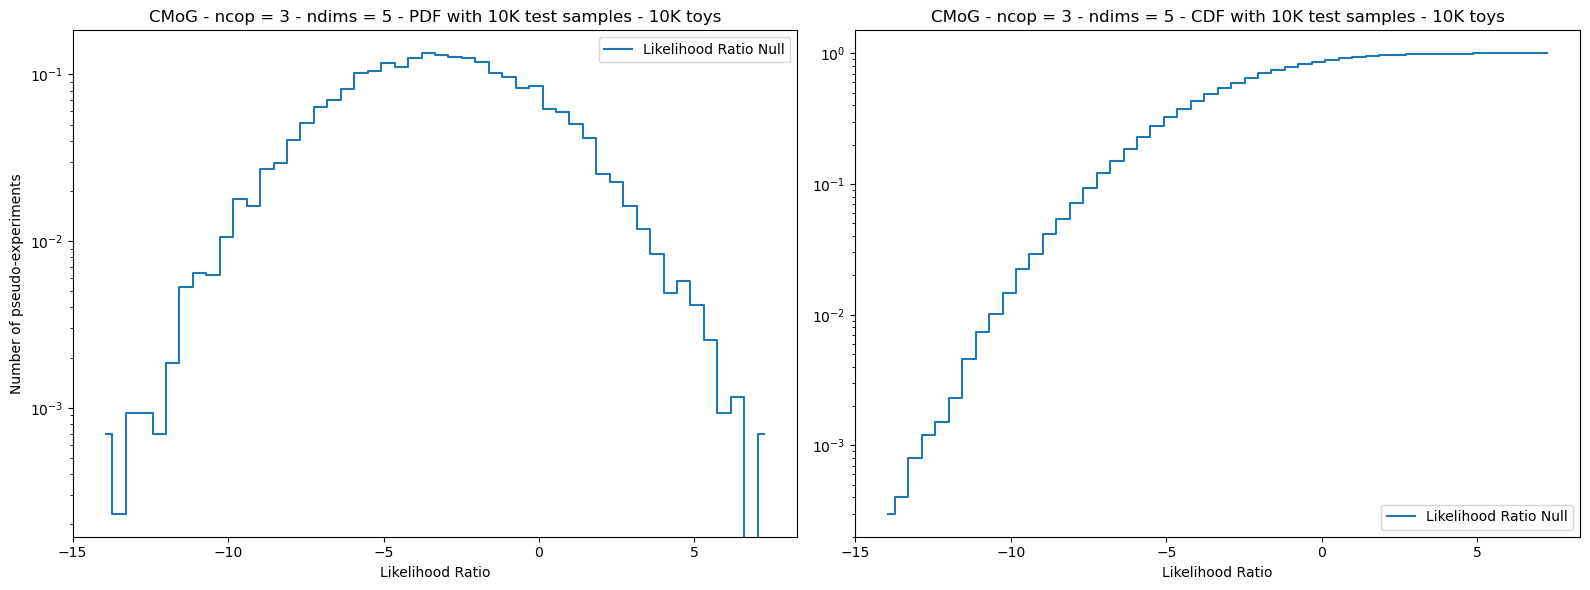

Time elapsed: 0.6806305702775717 seconds.


In [ ]:
start = timer()

nsamples = LRMetric.Inputs.batch_size_test
niter = LRMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(-300,-100)
#ax[0].set_ylim(0.00001, 0.02)
ax[0].set_xlabel('Likelihood Ratio')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(-300,-100)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Likelihood Ratio')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], -1.8054356934517268],
 [0.95, [9500, 500], 1.7269475633248532],
 [0.99, [9900, 100], 3.8596137612172567]]

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000129
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=False,
                             verbose = True)
LRMetric.Test_tf()
LRMetric.Results[-1].result_value

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.


Setting dist_num from dist_symb.
To run under the null hypothesis, set the `null_test` attribute to True.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 5.614698325283825 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, -26552.47483623,
        -26009.27182095, -26356.5578978 , -26635.53715761, -25999.13544257,
        -26068.22485645, -26277.71193775]),
 'logprob_ref_alt_sum_list': array([-26118.15551017, -26164.3891699 , -26208.1627619 , -26223.00549925,
        -26725.71349401, -26383.65527918, -26948.36073883, -26306.91453948,
        -26428.51429243, -26328.52068525]),
 'logprob_alt_alt_sum_list': array([-26112.45832133, -26164.63551897, -26206.4721818 , -26221.51280242,
        -26722.19821205, -26383.52890402, -26946.81014953, -26306.64045914,
        -26430.02762975, -26328.83684636]),
 'lik_ratio_list': array([11.39437769, -0.49269814,  3.38116019,  2.98539366,  7.03056392,
         0.25275032,  3.10117859,  0.54816066, -3.02667463, -0.63232223]),
 'lik_ratio_norm_list': array([ 0.11394378, -0.00492698,  0.0338116 ,  0.02985394,  0.07030564,
         0.0025275 ,  0.03101179,  0.00548161, -0.03026675, -0.006

In [ ]:
np.mean(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)

1.735373687262832

#### LR Test (99% CL) - $\epsilon=$

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000172
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000


LR metric calculation completed in 1547.6844881772995 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, ...,
        -26414.61320193, -26051.01197648, -26070.38371944]),
 'logprob_ref_alt_sum_list': array([-26119.44929672, -26171.75648107, -26213.63406758, ...,
        -26145.33669568, -26199.68479434, -26171.97875077]),
 'logprob_alt_alt_sum_list': array([-26118.72855364, -26179.32370923, -26218.70904769, ...,
        -26146.68662594, -26206.08457696, -26175.97334446]),
 'lik_ratio_list': array([  1.44148615, -15.13445633, -10.14996021, ...,  -2.69986051,
        -12.79956523,  -7.98918738]),
 'lik_ratio_norm_list': array([ 0.01441486, -0.15134456, -0.1014996 , ..., -0.02699861,
        -0.12799565, -0.07989187])}

In [ ]:
#LRMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_LR_eps_0000164.json")
LRMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_LR_eps_0000172.json")

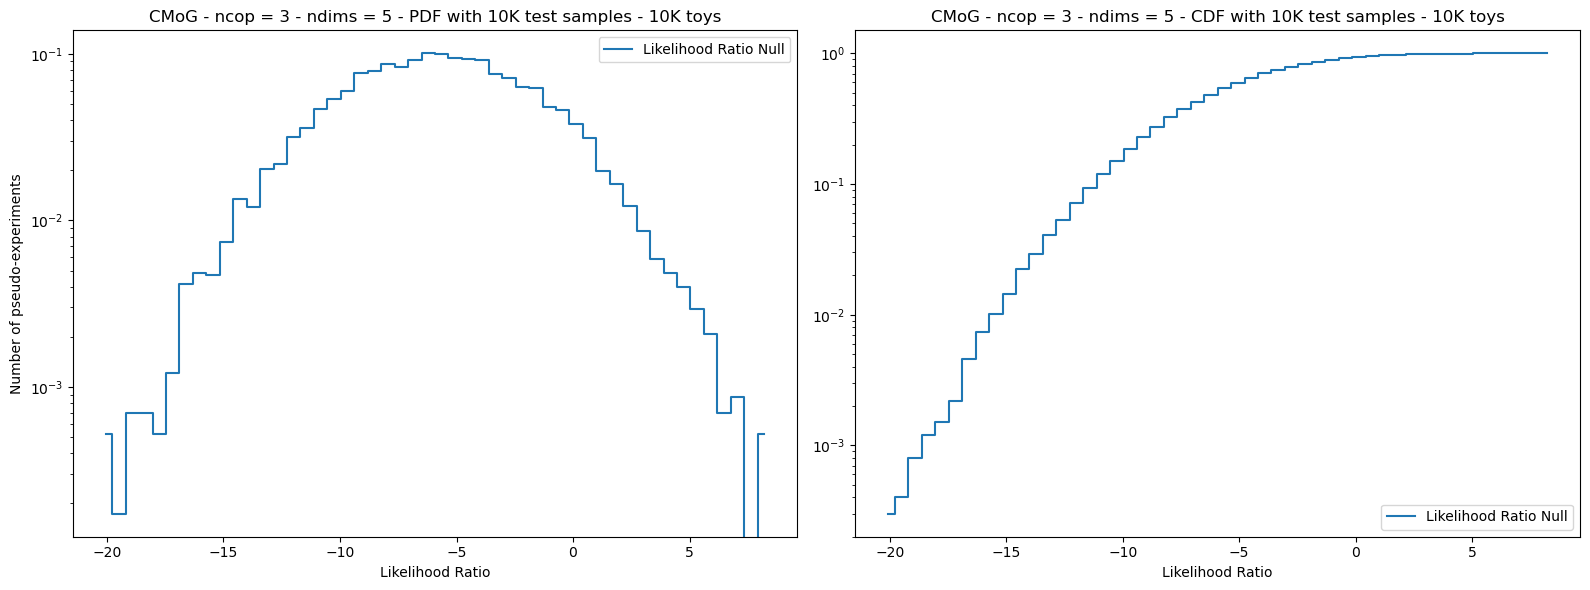

Time elapsed: 0.625993225723505 seconds.


In [ ]:
start = timer()

nsamples = LRMetric.Inputs.batch_size_test
niter = LRMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(-300,-100)
#ax[0].set_ylim(0.00001, 0.02)
ax[0].set_xlabel('Likelihood Ratio')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(-300,-100)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Likelihood Ratio')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], -3.8507828409452776],
 [0.95, [9500, 500], 0.8783876456769724],
 [0.99, [9900, 100], 3.7233201427059117]]

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000172
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=False,
                             verbose = True)
LRMetric.Test_tf()
LRMetric.Results[-1].result_value

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
To run under the null hypothesis, set the `null_test` attribute to True.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 5.2657355554401875 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, -26552.47483623,
        -26009.27182095, -26356.5578978 , -26635.53715761, -25999.13544257,
        -26068.22485645, -26277.71193775]),
 'logprob_ref_alt_sum_list': array([-26118.7035072 , -26162.96190057, -26207.38137364, -26222.15460491,
        -26725.54300011, -26382.35594709, -26947.5452308 , -26305.66355997,
        -26426.66706172, -26327.07408914]),
 'logprob_alt_alt_sum_list': array([-26110.12648722, -26162.26026668, -26204.08328658, -26219.18406612,
        -26719.89191874, -26381.15906639, -26944.46136136, -26304.25428873,
        -26427.66186975, -26326.47546857]),
 'lik_ratio_list': array([17.15403997,  1.40326777,  6.59617411,  5.94107758, 11.30216274,
         2.39376138,  6.16773888,  2.81854247, -1.98961605,  1.19724114]),
 'lik_ratio_norm_list': array([ 0.1715404 ,  0.01403268,  0.06596174,  0.05941078,  0.11302163,
         0.02393761,  0.06167739,  0.02818542, -0.01989616,  0.011

In [ ]:
np.mean(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)

3.7465621462337118

### Shift stds

#### Thresholds

In [ ]:
fn_thresholds = fn_thresholds[1:]
fpd_thresholds = fpd_thresholds[1:]
kpd_thresholds = kpd_thresholds[1:]
ks_thresholds = ks_thresholds[1:]
#multi_ks_thresholds = multi_ks_thresholds[1:]
sks_thresholds = sks_thresholds[1:]
swd_thresholds = swd_thresholds[1:]

In [ ]:
print(f"fn_thresholds: {fn_thresholds}")
print(f"fpd_thresholds: {fpd_thresholds}")
print(f"kpd_thresholds: {kpd_thresholds}")
print(f"ks_thresholds: {ks_thresholds}")
#print(f"multi_ks_thresholds: {multi_ks_thresholds}")
print(f"sks_thresholds: {sks_thresholds}")
print(f"swd_thresholds: {swd_thresholds}")

fn_thresholds: [[0.95, [950, 50], 1.2365268905752], [0.99, [990, 10], 1.4684991255333162]]
fpd_thresholds: [[0.95, [950, 50], 45.09527678297439], [0.99, [990, 10], 50.271573973192034]]
kpd_thresholds: [[0.95, [950, 50], 0.5113814932343488], [0.99, [990, 10], 1.3044753512548064]]
ks_thresholds: [[0.95, [950, 50], 1.1381595409713376], [0.99, [990, 10], 1.3528197029565723]]
sks_thresholds: [[0.95, [950, 50], 1.0992073254638377], [0.99, [990, 10], 1.2521102453513773]]
swd_thresholds: [[0.95, [950, 50], 0.9747483375186353], [0.99, [990, 10], 1.1664085018754888]]


#### Scan and exclusion limits

In [ ]:
niter = 1_000
nsamples = 100_000
ns = nsamples**2 /(2*nsamples)

fn_list = []
fpd_list = []
kpd_list = []
ks_list = []
#multi_ks_list = []
sks_list = []
swd_list = []
exclusion_list = []

fn_threshold_number = 0
fpd_threshold_number = 0
kpd_threshold_number = 0
ks_threshold_number = 0
#multi_ks_threshold_number = 0
sks_threshold_number = 0
swd_threshold_number = 0

start = timer()  
for i in range(500):
    seed = 0
    ncomp = 3
    ndims = 5
    delta = 0.0001
    eps = 0+i*delta
    print("\n------------------")
    print(f"eps = {eps}")
    eps_loc = 10*eps
    eps_scale = eps
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
    dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)

    TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                       dist_2_input = dist_2,
                                                       niter = 10,
                                                       batch_size_test = 100_000,
                                                       batch_size_gen = 1000,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = False)

    FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             verbose = False)
    FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = False,
                               verbose = False)
    KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                                 progress_bar = False,
                                 verbose = False)
    KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                             verbose = False)
    #MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
    #                                   verbose = False)
    SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               verbose = False)
    SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                                   nslices = 100,
                                   seed_slicing = 0,
                                   verbose = False)

    if fn_threshold_number < len(fn_thresholds):
        FNMetric.Test_tf(max_vectorize = 1000)
        fn = np.mean(FNMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)/ndims
        fn_list.append(fn)
        print(f"fn statistic = {fn}\t-\t next threshold = {fn_thresholds[fn_threshold_number][2]} at {fn_thresholds[fn_threshold_number][0]} CL")
        fn_threshold = fn_thresholds[fn_threshold_number]
        if fn > fn_threshold[2]:
            end = timer()
            print(f"=======> fn excluded at {fn_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fn statistic", fn, fn_threshold[0]])
            fn_threshold_number += 1
            
    if fpd_threshold_number < len(fpd_thresholds):
        FPDMetric.Test_tf(max_vectorize=400)
        fpd = np.mean(FPDMetric.Results[-1].result_value["metric_list"])*(ns/ndims)**(3/2)
        fpd_list.append(fpd)
        print(f"fpd statistic = {fpd}\t-\t next threshold = {fpd_thresholds[fpd_threshold_number][2]} at {fpd_thresholds[fpd_threshold_number][0]} CL")
        fpd_threshold = fpd_thresholds[fpd_threshold_number]
        if fpd > fpd_threshold[2]:
            end = timer()
            print(f"=======> fpd excluded at {fpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fpd statistic", fpd, fpd_threshold[0]])
            fpd_threshold_number += 1
            
    if kpd_threshold_number < len(kpd_thresholds):
        KPDMetric.Test_tf(max_vectorize=2)
        kpd = np.mean(KPDMetric.Results[-1].result_value["metric_list"])*ns/np.sqrt(ndims)
        kpd_list.append(kpd)
        print(f"kpd statistic = {kpd}\t-\t next threshold = {kpd_thresholds[kpd_threshold_number][2]} at {kpd_thresholds[kpd_threshold_number][0]} CL")
        kpd_threshold = kpd_thresholds[kpd_threshold_number]
        if kpd > kpd_threshold[2]:
            end = timer()
            print(f"=======> kpd excluded at {kpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "kpd statistic", kpd, kpd_threshold[0]])
            kpd_threshold_number += 1

    if ks_threshold_number < len(ks_thresholds):
        KSTest.Test_tf(max_vectorize=1000)
        ks = np.mean(KSTest.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
        ks_list.append(ks)
        print(f"ks statistic = {ks}\t-\t next threshold = {ks_thresholds[ks_threshold_number][2]} at {ks_thresholds[ks_threshold_number][0]} CL")
        ks_threshold = ks_thresholds[ks_threshold_number]
        if ks > ks_threshold[2]:
            end = timer()
            print(f"=======> ks excluded at {ks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "ks statistic", ks, ks_threshold[0]])
            ks_threshold_number += 1
            
    #if multi_ks_threshold_number < len(multi_ks_thresholds):
    #    MultiKSTest.Test_tf()
    #    multi_ks = np.mean(MultiKSTest.Results[-1].result_value["metric_list"])*np.sqrt(ns)
    #    multi_ks_list.append(multi_ks)
    #    print(f"multi ks statistic = {multi_ks}\t-\t next threshold = {multi_ks_thresholds[multi_ks_threshold_number][2]} at {multi_ks_thresholds[multi_ks_threshold_number][0]} CL")
    #    multi_ks_threshold = multi_ks_thresholds[multi_ks_threshold_number]
    #    if multi_ks > multi_ks_threshold[2]:
    #        end = timer()
    #        print(f"=======> multi ks excluded at {multi_ks_threshold[0]} CL in {end-start} seconds")
    #        exclusion_list.append([eps, "multi ks statistic", multi_ks, multi_ks_threshold[0]])
    #        multi_ks_threshold_number += 1
            
    if sks_threshold_number < len(sks_thresholds):
        SKSTest.Test_tf(max_vectorize=1000)
        sks = np.mean(SKSTest.Results[-1].result_value["metric_means"])*np.sqrt(ns)
        sks_list.append(sks)
        print(f"sks statistic = {sks}\t-\t next threshold = {sks_thresholds[sks_threshold_number][2]} at {sks_thresholds[sks_threshold_number][0]} CL")
        sks_threshold = sks_thresholds[sks_threshold_number]
        if sks > sks_threshold[2]:
            end = timer()
            print(f"=======> sks excluded at {sks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "sks statistic", sks, sks_threshold[0]])
            sks_threshold_number += 1
            
    if swd_threshold_number < len(swd_thresholds):
        SWDMetric.Test_tf(max_vectorize=1000)
        swd = np.mean(SWDMetric.Results[-1].result_value["metric_means"])*np.sqrt(ns/ndims)
        swd_list.append(swd)
        print(f"swd statistic = {swd}\t-\t next threshold = {swd_thresholds[swd_threshold_number][2]} at {swd_thresholds[swd_threshold_number][0]} CL")
        swd_threshold = swd_thresholds[swd_threshold_number]
        if swd > swd_threshold[2]:
            end = timer()
            print(f"=======> swd excluded at {swd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "swd statistic", swd, swd_threshold[0]])
            swd_threshold_number += 1
            
    #if fn_threshold_number >= len(fn_thresholds) and fpd_threshold_number >= len(fpd_thresholds) and kpd_threshold_number >= len(kpd_thresholds) and ks_threshold_number >= len(ks_thresholds) and multi_ks_threshold_number >= len(multi_ks_thresholds) and sks_threshold_number >= len(sks_thresholds) and swd_threshold_number >= len(swd_thresholds):
    if fn_threshold_number >= len(fn_thresholds) and fpd_threshold_number >= len(fpd_thresholds) and kpd_threshold_number >= len(kpd_thresholds) and ks_threshold_number >= len(ks_thresholds) and sks_threshold_number >= len(sks_thresholds) and swd_threshold_number >= len(swd_thresholds):
        break
                        
end = timer()
print("Time elapsed:", end-start, "seconds.")


------------------
eps = 0.0
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 0.598196053283708	-	 next threshold = 1.2365268905752 at 0.95 CL
fpd statistic = 39.966326032964936	-	 next threshold = 45.09527678297439 at 0.95 CL
kpd statistic = -0.5515261106260152	-	 next threshold = 0.5113814932343488 at 0.95 CL
ks statistic = 0.8491697351567128	-	 next threshold = 1.1381595409713376 at 0.95 CL
sks statistic = 0.8557509388905462	-	 next threshold = 1.0992073254638377 at 0.95 CL
swd statistic = 0.5858245207476112	-	 next threshold = 0.9747483375186353 at 0.95 CL

------------------
eps = 0.0001
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 0.583483946108059	-	 next threshold = 1.2365268905752 at 0.95 CL
fpd statistic = 39.975581328907694	-	 next threshold = 45.09527678297439 at 0.95 CL
kpd statistic = -0.5452509834419949	-	 next t

#### Results show and save

In [ ]:
print(f"fn_thresholds: {fn_thresholds}")
print(f"fpd_thresholds: {fpd_thresholds}")
print(f"kpd_thresholds: {kpd_thresholds}")
print(f"ks_thresholds: {ks_thresholds}")
print(f"multi_ks_thresholds: {multi_ks_thresholds}")
print(f"sks_thresholds: {sks_thresholds}")
print(f"swd_thresholds: {swd_thresholds}")

fn_thresholds: [[0.95, [9500, 500], 1.201933747163374], [0.99, [9900, 100], 1.5292055424498905]]
fpd_thresholds: [[0.95, [9500, 500], 4.329877652456557], [0.99, [9900, 100], 6.352959846557846]]
kpd_thresholds: [[0.95, [9500, 500], 0.30746255888564705], [0.99, [9900, 100], 0.5753294046664447]]
ks_thresholds: [[0.95, [9500, 500], 1.1313706138761246], [0.99, [9900, 100], 1.2855206049622938]]
multi_ks_thresholds: [[0.95, [9500, 500], 1.4566393387274343], [0.99, [9900, 100], 1.668772856652466]]
sks_thresholds: [[0.95, [9500, 500], 1.112986448315256], [0.99, [9900, 100], 1.2742067049480295]]
swd_thresholds: [[0.95, [9500, 500], 2.202632934055404], [0.99, [9900, 100], 2.709669622518888]]


In [ ]:
exclusion_list

NameError: name 'exclusion_list' is not defined

In [ ]:
exclusion_list_dict = {"5D": exclusion_list}

In [ ]:
with open(null_hypotheses_dir+"exclusion_list.json", "w") as outfile:
    json.dump(exclusion_list_dict, outfile)

In [ ]:
with open(null_hypotheses_dir+"exclusion_list.json", "r") as infile:
    exclusion_list_dict = json.load(infile)

In [ ]:
exclusion_list_dict

{'5D': [[0.001, 'ks statistic', 1.150887381160314, 0.95],
  [0.0012000000000000001, 'multi ks statistic', 1.530886280735438, 0.95],
  [0.0014, 'ks statistic', 1.3180470296371594, 0.99],
  [0.0014, 'multi ks statistic', 1.7239264333480646, 0.99],
  [0.0028, 'sks statistic', 1.1180563783334174, 0.95],
  [0.0038, 'sks statistic', 1.2864044770591279, 0.99],
  [0.0056, 'fn statistic', 1.211483576862899, 0.95],
  [0.0071, 'fpd statistic', 4.362107332247842, 0.95],
  [0.0079, 'fn statistic', 1.536376470735762, 0.99],
  [0.008400000000000001, 'kpd statistic', 0.3087719336084374, 0.95],
  [0.0097, 'fpd statistic', 6.420883800476466, 0.99],
  [0.0117, 'kpd statistic', 0.5851484911513134, 0.99],
  [0.0143, 'swd statistic', 2.2122717982708178, 0.95],
  [0.018000000000000002, 'swd statistic', 2.717441299061513, 0.99]],
 '20D': [[0.0009000000000000001, 'ks statistic', 1.18069179640513, 0.95],
  [0.0013000000000000002, 'ks statistic', 1.4118451834412984, 0.99],
  [0.0028, 'fn statistic', 1.2218990783

#### LR Test (95% CL) - $\epsilon=$

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000129
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000
LR metric calculation completed in 1648.533557456918 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, ...,
        -26414.61320193, -26051.01197648, -26070.38371944]),
 'logprob_ref_alt_sum_list': array([-26119.44929672, -26171.75648107, -26213.63406758, ...,
        -26145.33669568, -26199.68479434, -26171.97875077]),
 'logprob_alt_alt_sum_list': array([-26118.16856901, -26176.65122606, -26216.65046218, ...,
        -26145.60348555, -26203.71388187, -26174.22928749]),
 'lik_ratio_list': array([ 2.56145542, -9.78948998, -6.0327892 , ..., -0.53357974,
        -8.05817506, -4.50107345]),
 'lik_ratio_norm_list': array([ 0.02561455, -0.0978949 , -0.06032789, ..., -0.0053358 ,
        -0.08058175, -0.04501073])}

In [ ]:
#LRMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_LR_eps_000011.json")
LRMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_LR_eps_0000129.json")

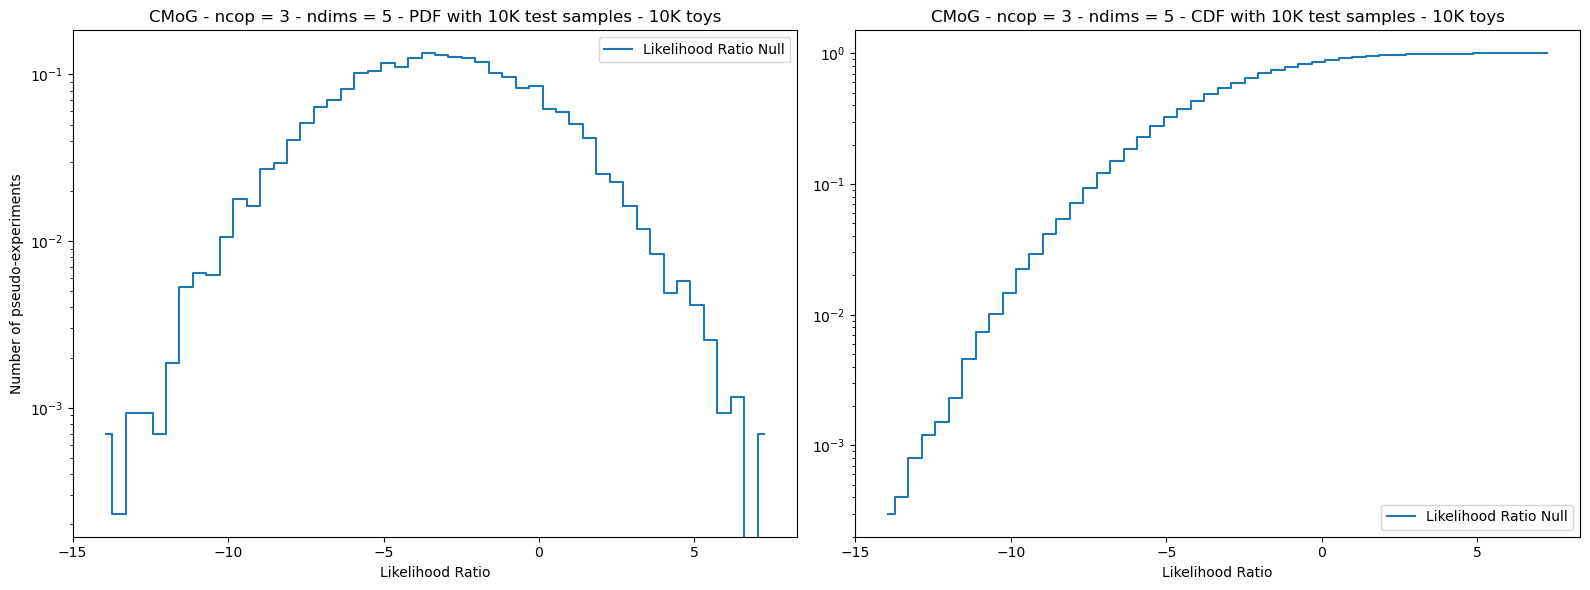

Time elapsed: 0.6806305702775717 seconds.


In [ ]:
start = timer()

nsamples = LRMetric.Inputs.batch_size_test
niter = LRMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(-300,-100)
#ax[0].set_ylim(0.00001, 0.02)
ax[0].set_xlabel('Likelihood Ratio')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(-300,-100)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Likelihood Ratio')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], -1.8054356934517268],
 [0.95, [9500, 500], 1.7269475633248532],
 [0.99, [9900, 100], 3.8596137612172567]]

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000129
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=False,
                             verbose = True)
LRMetric.Test_tf()
LRMetric.Results[-1].result_value

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.


Setting dist_num from dist_symb.
To run under the null hypothesis, set the `null_test` attribute to True.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 5.614698325283825 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, -26552.47483623,
        -26009.27182095, -26356.5578978 , -26635.53715761, -25999.13544257,
        -26068.22485645, -26277.71193775]),
 'logprob_ref_alt_sum_list': array([-26118.15551017, -26164.3891699 , -26208.1627619 , -26223.00549925,
        -26725.71349401, -26383.65527918, -26948.36073883, -26306.91453948,
        -26428.51429243, -26328.52068525]),
 'logprob_alt_alt_sum_list': array([-26112.45832133, -26164.63551897, -26206.4721818 , -26221.51280242,
        -26722.19821205, -26383.52890402, -26946.81014953, -26306.64045914,
        -26430.02762975, -26328.83684636]),
 'lik_ratio_list': array([11.39437769, -0.49269814,  3.38116019,  2.98539366,  7.03056392,
         0.25275032,  3.10117859,  0.54816066, -3.02667463, -0.63232223]),
 'lik_ratio_norm_list': array([ 0.11394378, -0.00492698,  0.0338116 ,  0.02985394,  0.07030564,
         0.0025275 ,  0.03101179,  0.00548161, -0.03026675, -0.006

In [ ]:
np.mean(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)

1.735373687262832

#### LR Test (99% CL) - $\epsilon=$

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000172
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000


LR metric calculation completed in 1547.6844881772995 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, ...,
        -26414.61320193, -26051.01197648, -26070.38371944]),
 'logprob_ref_alt_sum_list': array([-26119.44929672, -26171.75648107, -26213.63406758, ...,
        -26145.33669568, -26199.68479434, -26171.97875077]),
 'logprob_alt_alt_sum_list': array([-26118.72855364, -26179.32370923, -26218.70904769, ...,
        -26146.68662594, -26206.08457696, -26175.97334446]),
 'lik_ratio_list': array([  1.44148615, -15.13445633, -10.14996021, ...,  -2.69986051,
        -12.79956523,  -7.98918738]),
 'lik_ratio_norm_list': array([ 0.01441486, -0.15134456, -0.1014996 , ..., -0.02699861,
        -0.12799565, -0.07989187])}

In [ ]:
#LRMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_LR_eps_0000164.json")
LRMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_LR_eps_0000172.json")

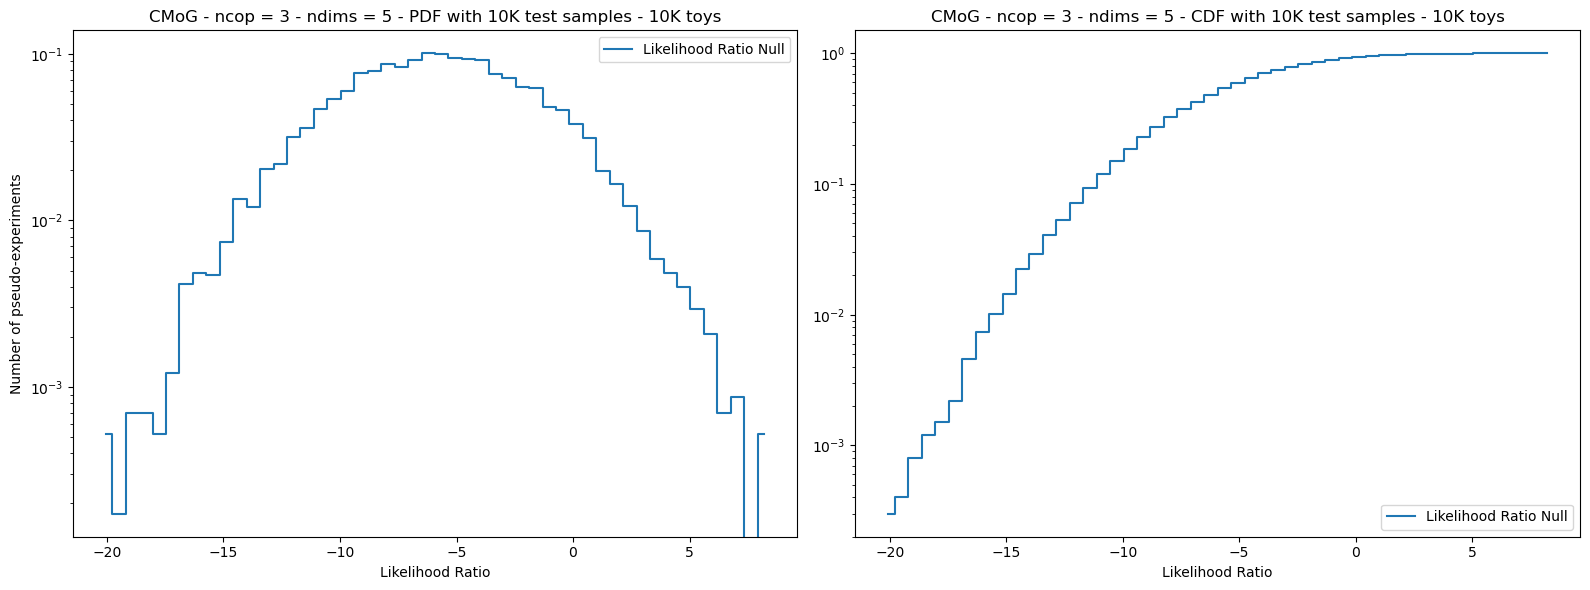

Time elapsed: 0.625993225723505 seconds.


In [ ]:
start = timer()

nsamples = LRMetric.Inputs.batch_size_test
niter = LRMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(-300,-100)
#ax[0].set_ylim(0.00001, 0.02)
ax[0].set_xlabel('Likelihood Ratio')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(-300,-100)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Likelihood Ratio')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], -3.8507828409452776],
 [0.95, [9500, 500], 0.8783876456769724],
 [0.99, [9900, 100], 3.7233201427059117]]

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000172
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=False,
                             verbose = True)
LRMetric.Test_tf()
LRMetric.Results[-1].result_value

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
To run under the null hypothesis, set the `null_test` attribute to True.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 5.2657355554401875 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, -26552.47483623,
        -26009.27182095, -26356.5578978 , -26635.53715761, -25999.13544257,
        -26068.22485645, -26277.71193775]),
 'logprob_ref_alt_sum_list': array([-26118.7035072 , -26162.96190057, -26207.38137364, -26222.15460491,
        -26725.54300011, -26382.35594709, -26947.5452308 , -26305.66355997,
        -26426.66706172, -26327.07408914]),
 'logprob_alt_alt_sum_list': array([-26110.12648722, -26162.26026668, -26204.08328658, -26219.18406612,
        -26719.89191874, -26381.15906639, -26944.46136136, -26304.25428873,
        -26427.66186975, -26326.47546857]),
 'lik_ratio_list': array([17.15403997,  1.40326777,  6.59617411,  5.94107758, 11.30216274,
         2.39376138,  6.16773888,  2.81854247, -1.98961605,  1.19724114]),
 'lik_ratio_norm_list': array([ 0.1715404 ,  0.01403268,  0.06596174,  0.05941078,  0.11302163,
         0.02393761,  0.06167739,  0.02818542, -0.01989616,  0.011

In [ ]:
np.mean(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)

3.7465621462337118

### Shift all

#### Thresholds

In [ ]:
fn_thresholds = fn_thresholds[1:]
fpd_thresholds = fpd_thresholds[1:]
kpd_thresholds = kpd_thresholds[1:]
ks_thresholds = ks_thresholds[1:]
#multi_ks_thresholds = multi_ks_thresholds[1:]
sks_thresholds = sks_thresholds[1:]
swd_thresholds = swd_thresholds[1:]

In [ ]:
print(f"fn_thresholds: {fn_thresholds}")
print(f"fpd_thresholds: {fpd_thresholds}")
print(f"kpd_thresholds: {kpd_thresholds}")
print(f"ks_thresholds: {ks_thresholds}")
#print(f"multi_ks_thresholds: {multi_ks_thresholds}")
print(f"sks_thresholds: {sks_thresholds}")
print(f"swd_thresholds: {swd_thresholds}")

fn_thresholds: [[0.95, [950, 50], 1.2365268905752], [0.99, [990, 10], 1.4684991255333162]]
fpd_thresholds: [[0.95, [950, 50], 45.09527678297439], [0.99, [990, 10], 50.271573973192034]]
kpd_thresholds: [[0.95, [950, 50], 0.5113814932343488], [0.99, [990, 10], 1.3044753512548064]]
ks_thresholds: [[0.95, [950, 50], 1.1381595409713376], [0.99, [990, 10], 1.3528197029565723]]
sks_thresholds: [[0.95, [950, 50], 1.0992073254638377], [0.99, [990, 10], 1.2521102453513773]]
swd_thresholds: [[0.95, [950, 50], 0.9747483375186353], [0.99, [990, 10], 1.1664085018754888]]


#### Scan and exclusion limits

In [ ]:
niter = 1_000
nsamples = 100_000
ns = nsamples**2 /(2*nsamples)

fn_list = []
fpd_list = []
kpd_list = []
ks_list = []
#multi_ks_list = []
sks_list = []
swd_list = []
exclusion_list = []

fn_threshold_number = 0
fpd_threshold_number = 0
kpd_threshold_number = 0
ks_threshold_number = 0
#multi_ks_threshold_number = 0
sks_threshold_number = 0
swd_threshold_number = 0

start = timer()  
for i in range(500):
    seed = 0
    ncomp = 3
    ndims = 5
    delta = 0.0001
    eps = 0+i*delta
    print("\n------------------")
    print(f"eps = {eps}")
    eps_loc = 10*eps
    eps_scale = eps
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
    dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)

    TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                       dist_2_input = dist_2,
                                                       niter = 10,
                                                       batch_size_test = 100_000,
                                                       batch_size_gen = 1000,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = False)

    FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             verbose = False)
    FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = False,
                               verbose = False)
    KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                                 progress_bar = False,
                                 verbose = False)
    KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                             verbose = False)
    #MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
    #                                   verbose = False)
    SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               verbose = False)
    SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                                   nslices = 100,
                                   seed_slicing = 0,
                                   verbose = False)

    if fn_threshold_number < len(fn_thresholds):
        FNMetric.Test_tf(max_vectorize = 1000)
        fn = np.mean(FNMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)/ndims
        fn_list.append(fn)
        print(f"fn statistic = {fn}\t-\t next threshold = {fn_thresholds[fn_threshold_number][2]} at {fn_thresholds[fn_threshold_number][0]} CL")
        fn_threshold = fn_thresholds[fn_threshold_number]
        if fn > fn_threshold[2]:
            end = timer()
            print(f"=======> fn excluded at {fn_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fn statistic", fn, fn_threshold[0]])
            fn_threshold_number += 1
            
    if fpd_threshold_number < len(fpd_thresholds):
        FPDMetric.Test_tf(max_vectorize=400)
        fpd = np.mean(FPDMetric.Results[-1].result_value["metric_list"])*(ns/ndims)**(3/2)
        fpd_list.append(fpd)
        print(f"fpd statistic = {fpd}\t-\t next threshold = {fpd_thresholds[fpd_threshold_number][2]} at {fpd_thresholds[fpd_threshold_number][0]} CL")
        fpd_threshold = fpd_thresholds[fpd_threshold_number]
        if fpd > fpd_threshold[2]:
            end = timer()
            print(f"=======> fpd excluded at {fpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fpd statistic", fpd, fpd_threshold[0]])
            fpd_threshold_number += 1
            
    if kpd_threshold_number < len(kpd_thresholds):
        KPDMetric.Test_tf(max_vectorize=2)
        kpd = np.mean(KPDMetric.Results[-1].result_value["metric_list"])*ns/np.sqrt(ndims)
        kpd_list.append(kpd)
        print(f"kpd statistic = {kpd}\t-\t next threshold = {kpd_thresholds[kpd_threshold_number][2]} at {kpd_thresholds[kpd_threshold_number][0]} CL")
        kpd_threshold = kpd_thresholds[kpd_threshold_number]
        if kpd > kpd_threshold[2]:
            end = timer()
            print(f"=======> kpd excluded at {kpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "kpd statistic", kpd, kpd_threshold[0]])
            kpd_threshold_number += 1

    if ks_threshold_number < len(ks_thresholds):
        KSTest.Test_tf(max_vectorize=1000)
        ks = np.mean(KSTest.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
        ks_list.append(ks)
        print(f"ks statistic = {ks}\t-\t next threshold = {ks_thresholds[ks_threshold_number][2]} at {ks_thresholds[ks_threshold_number][0]} CL")
        ks_threshold = ks_thresholds[ks_threshold_number]
        if ks > ks_threshold[2]:
            end = timer()
            print(f"=======> ks excluded at {ks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "ks statistic", ks, ks_threshold[0]])
            ks_threshold_number += 1
            
    #if multi_ks_threshold_number < len(multi_ks_thresholds):
    #    MultiKSTest.Test_tf()
    #    multi_ks = np.mean(MultiKSTest.Results[-1].result_value["metric_list"])*np.sqrt(ns)
    #    multi_ks_list.append(multi_ks)
    #    print(f"multi ks statistic = {multi_ks}\t-\t next threshold = {multi_ks_thresholds[multi_ks_threshold_number][2]} at {multi_ks_thresholds[multi_ks_threshold_number][0]} CL")
    #    multi_ks_threshold = multi_ks_thresholds[multi_ks_threshold_number]
    #    if multi_ks > multi_ks_threshold[2]:
    #        end = timer()
    #        print(f"=======> multi ks excluded at {multi_ks_threshold[0]} CL in {end-start} seconds")
    #        exclusion_list.append([eps, "multi ks statistic", multi_ks, multi_ks_threshold[0]])
    #        multi_ks_threshold_number += 1
            
    if sks_threshold_number < len(sks_thresholds):
        SKSTest.Test_tf(max_vectorize=1000)
        sks = np.mean(SKSTest.Results[-1].result_value["metric_means"])*np.sqrt(ns)
        sks_list.append(sks)
        print(f"sks statistic = {sks}\t-\t next threshold = {sks_thresholds[sks_threshold_number][2]} at {sks_thresholds[sks_threshold_number][0]} CL")
        sks_threshold = sks_thresholds[sks_threshold_number]
        if sks > sks_threshold[2]:
            end = timer()
            print(f"=======> sks excluded at {sks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "sks statistic", sks, sks_threshold[0]])
            sks_threshold_number += 1
            
    if swd_threshold_number < len(swd_thresholds):
        SWDMetric.Test_tf(max_vectorize=1000)
        swd = np.mean(SWDMetric.Results[-1].result_value["metric_means"])*np.sqrt(ns/ndims)
        swd_list.append(swd)
        print(f"swd statistic = {swd}\t-\t next threshold = {swd_thresholds[swd_threshold_number][2]} at {swd_thresholds[swd_threshold_number][0]} CL")
        swd_threshold = swd_thresholds[swd_threshold_number]
        if swd > swd_threshold[2]:
            end = timer()
            print(f"=======> swd excluded at {swd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "swd statistic", swd, swd_threshold[0]])
            swd_threshold_number += 1
            
    #if fn_threshold_number >= len(fn_thresholds) and fpd_threshold_number >= len(fpd_thresholds) and kpd_threshold_number >= len(kpd_thresholds) and ks_threshold_number >= len(ks_thresholds) and multi_ks_threshold_number >= len(multi_ks_thresholds) and sks_threshold_number >= len(sks_thresholds) and swd_threshold_number >= len(swd_thresholds):
    if fn_threshold_number >= len(fn_thresholds) and fpd_threshold_number >= len(fpd_thresholds) and kpd_threshold_number >= len(kpd_thresholds) and ks_threshold_number >= len(ks_thresholds) and sks_threshold_number >= len(sks_thresholds) and swd_threshold_number >= len(swd_thresholds):
        break
                        
end = timer()
print("Time elapsed:", end-start, "seconds.")


------------------
eps = 0.0
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 0.598196053283708	-	 next threshold = 1.2365268905752 at 0.95 CL
fpd statistic = 39.966326032964936	-	 next threshold = 45.09527678297439 at 0.95 CL
kpd statistic = -0.5515261106260152	-	 next threshold = 0.5113814932343488 at 0.95 CL
ks statistic = 0.8491697351567128	-	 next threshold = 1.1381595409713376 at 0.95 CL
sks statistic = 0.8557509388905462	-	 next threshold = 1.0992073254638377 at 0.95 CL
swd statistic = 0.5858245207476112	-	 next threshold = 0.9747483375186353 at 0.95 CL

------------------
eps = 0.0001
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 0.583483946108059	-	 next threshold = 1.2365268905752 at 0.95 CL
fpd statistic = 39.975581328907694	-	 next threshold = 45.09527678297439 at 0.95 CL
kpd statistic = -0.5452509834419949	-	 next t

#### Results show and save

In [ ]:
print(f"fn_thresholds: {fn_thresholds}")
print(f"fpd_thresholds: {fpd_thresholds}")
print(f"kpd_thresholds: {kpd_thresholds}")
print(f"ks_thresholds: {ks_thresholds}")
print(f"multi_ks_thresholds: {multi_ks_thresholds}")
print(f"sks_thresholds: {sks_thresholds}")
print(f"swd_thresholds: {swd_thresholds}")

fn_thresholds: [[0.95, [9500, 500], 1.201933747163374], [0.99, [9900, 100], 1.5292055424498905]]
fpd_thresholds: [[0.95, [9500, 500], 4.329877652456557], [0.99, [9900, 100], 6.352959846557846]]
kpd_thresholds: [[0.95, [9500, 500], 0.30746255888564705], [0.99, [9900, 100], 0.5753294046664447]]
ks_thresholds: [[0.95, [9500, 500], 1.1313706138761246], [0.99, [9900, 100], 1.2855206049622938]]
multi_ks_thresholds: [[0.95, [9500, 500], 1.4566393387274343], [0.99, [9900, 100], 1.668772856652466]]
sks_thresholds: [[0.95, [9500, 500], 1.112986448315256], [0.99, [9900, 100], 1.2742067049480295]]
swd_thresholds: [[0.95, [9500, 500], 2.202632934055404], [0.99, [9900, 100], 2.709669622518888]]


In [ ]:
exclusion_list

NameError: name 'exclusion_list' is not defined

In [ ]:
exclusion_list_dict = {"5D": exclusion_list}

In [ ]:
with open(null_hypotheses_dir+"exclusion_list.json", "w") as outfile:
    json.dump(exclusion_list_dict, outfile)

In [ ]:
with open(null_hypotheses_dir+"exclusion_list.json", "r") as infile:
    exclusion_list_dict = json.load(infile)

In [ ]:
exclusion_list_dict

{'5D': [[0.001, 'ks statistic', 1.150887381160314, 0.95],
  [0.0012000000000000001, 'multi ks statistic', 1.530886280735438, 0.95],
  [0.0014, 'ks statistic', 1.3180470296371594, 0.99],
  [0.0014, 'multi ks statistic', 1.7239264333480646, 0.99],
  [0.0028, 'sks statistic', 1.1180563783334174, 0.95],
  [0.0038, 'sks statistic', 1.2864044770591279, 0.99],
  [0.0056, 'fn statistic', 1.211483576862899, 0.95],
  [0.0071, 'fpd statistic', 4.362107332247842, 0.95],
  [0.0079, 'fn statistic', 1.536376470735762, 0.99],
  [0.008400000000000001, 'kpd statistic', 0.3087719336084374, 0.95],
  [0.0097, 'fpd statistic', 6.420883800476466, 0.99],
  [0.0117, 'kpd statistic', 0.5851484911513134, 0.99],
  [0.0143, 'swd statistic', 2.2122717982708178, 0.95],
  [0.018000000000000002, 'swd statistic', 2.717441299061513, 0.99]],
 '20D': [[0.0009000000000000001, 'ks statistic', 1.18069179640513, 0.95],
  [0.0013000000000000002, 'ks statistic', 1.4118451834412984, 0.99],
  [0.0028, 'fn statistic', 1.2218990783

#### LR Test (95% CL) - $\epsilon=0.000129$

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000129
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000
LR metric calculation completed in 1648.533557456918 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, ...,
        -26414.61320193, -26051.01197648, -26070.38371944]),
 'logprob_ref_alt_sum_list': array([-26119.44929672, -26171.75648107, -26213.63406758, ...,
        -26145.33669568, -26199.68479434, -26171.97875077]),
 'logprob_alt_alt_sum_list': array([-26118.16856901, -26176.65122606, -26216.65046218, ...,
        -26145.60348555, -26203.71388187, -26174.22928749]),
 'lik_ratio_list': array([ 2.56145542, -9.78948998, -6.0327892 , ..., -0.53357974,
        -8.05817506, -4.50107345]),
 'lik_ratio_norm_list': array([ 0.02561455, -0.0978949 , -0.06032789, ..., -0.0053358 ,
        -0.08058175, -0.04501073])}

In [ ]:
#LRMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_LR_eps_000011.json")
LRMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_LR_eps_0000129.json")

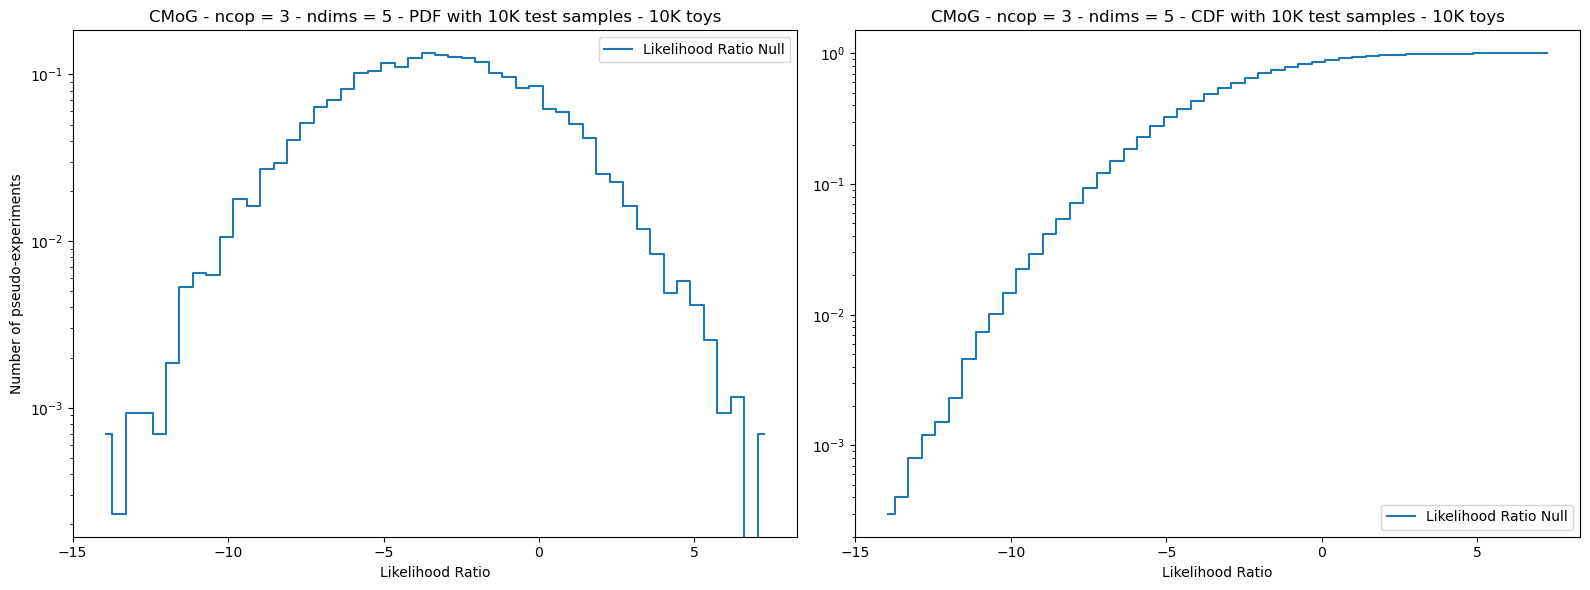

Time elapsed: 0.6806305702775717 seconds.


In [ ]:
start = timer()

nsamples = LRMetric.Inputs.batch_size_test
niter = LRMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(-300,-100)
#ax[0].set_ylim(0.00001, 0.02)
ax[0].set_xlabel('Likelihood Ratio')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(-300,-100)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Likelihood Ratio')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], -1.8054356934517268],
 [0.95, [9500, 500], 1.7269475633248532],
 [0.99, [9900, 100], 3.8596137612172567]]

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000129
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=False,
                             verbose = True)
LRMetric.Test_tf()
LRMetric.Results[-1].result_value

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.


Setting dist_num from dist_symb.
To run under the null hypothesis, set the `null_test` attribute to True.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 5.614698325283825 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, -26552.47483623,
        -26009.27182095, -26356.5578978 , -26635.53715761, -25999.13544257,
        -26068.22485645, -26277.71193775]),
 'logprob_ref_alt_sum_list': array([-26118.15551017, -26164.3891699 , -26208.1627619 , -26223.00549925,
        -26725.71349401, -26383.65527918, -26948.36073883, -26306.91453948,
        -26428.51429243, -26328.52068525]),
 'logprob_alt_alt_sum_list': array([-26112.45832133, -26164.63551897, -26206.4721818 , -26221.51280242,
        -26722.19821205, -26383.52890402, -26946.81014953, -26306.64045914,
        -26430.02762975, -26328.83684636]),
 'lik_ratio_list': array([11.39437769, -0.49269814,  3.38116019,  2.98539366,  7.03056392,
         0.25275032,  3.10117859,  0.54816066, -3.02667463, -0.63232223]),
 'lik_ratio_norm_list': array([ 0.11394378, -0.00492698,  0.0338116 ,  0.02985394,  0.07030564,
         0.0025275 ,  0.03101179,  0.00548161, -0.03026675, -0.006

In [ ]:
np.mean(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)

1.735373687262832

#### LR Test (99% CL) - $\epsilon=0.000172$

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000172
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000


LR metric calculation completed in 1547.6844881772995 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, ...,
        -26414.61320193, -26051.01197648, -26070.38371944]),
 'logprob_ref_alt_sum_list': array([-26119.44929672, -26171.75648107, -26213.63406758, ...,
        -26145.33669568, -26199.68479434, -26171.97875077]),
 'logprob_alt_alt_sum_list': array([-26118.72855364, -26179.32370923, -26218.70904769, ...,
        -26146.68662594, -26206.08457696, -26175.97334446]),
 'lik_ratio_list': array([  1.44148615, -15.13445633, -10.14996021, ...,  -2.69986051,
        -12.79956523,  -7.98918738]),
 'lik_ratio_norm_list': array([ 0.01441486, -0.15134456, -0.1014996 , ..., -0.02699861,
        -0.12799565, -0.07989187])}

In [ ]:
#LRMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_LR_eps_0000164.json")
LRMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_LR_eps_0000172.json")

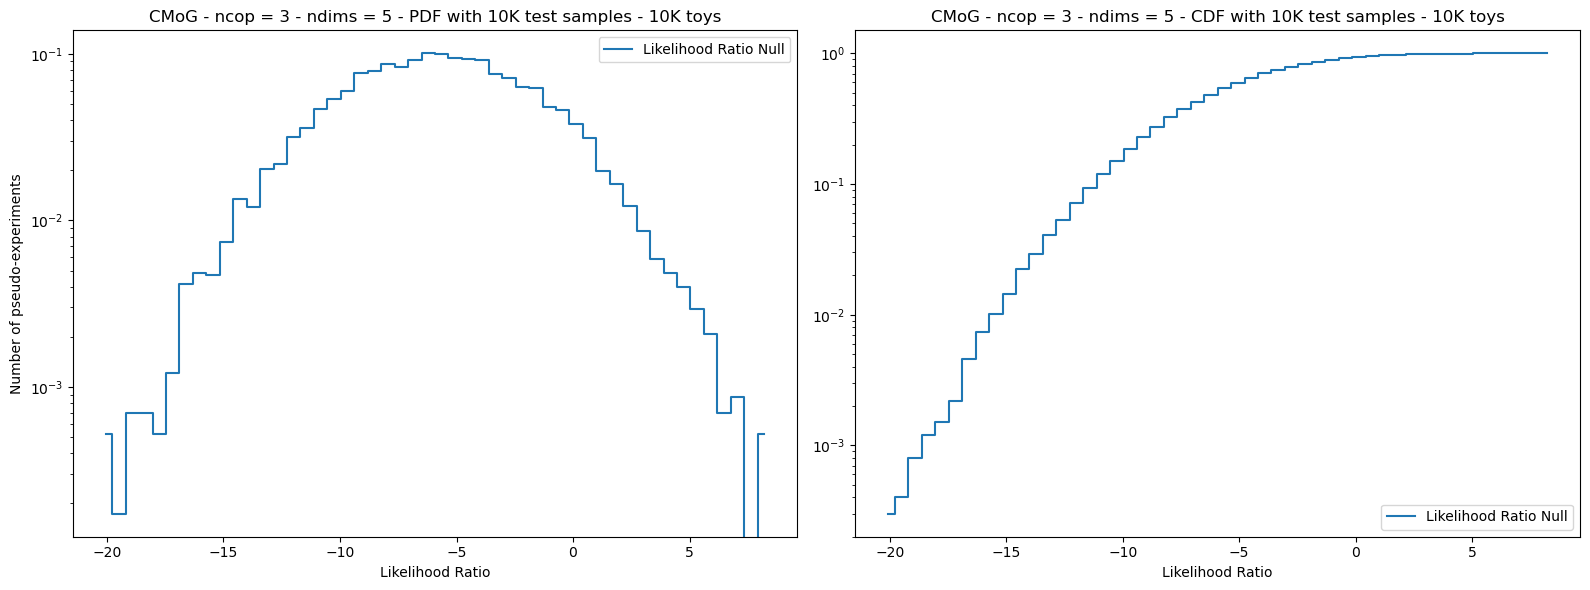

Time elapsed: 0.625993225723505 seconds.


In [ ]:
start = timer()

nsamples = LRMetric.Inputs.batch_size_test
niter = LRMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(-300,-100)
#ax[0].set_ylim(0.00001, 0.02)
ax[0].set_xlabel('Likelihood Ratio')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(-300,-100)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Likelihood Ratio')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], -3.8507828409452776],
 [0.95, [9500, 500], 0.8783876456769724],
 [0.99, [9900, 100], 3.7233201427059117]]

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000172
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=False,
                             verbose = True)
LRMetric.Test_tf()
LRMetric.Results[-1].result_value

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
To run under the null hypothesis, set the `null_test` attribute to True.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 5.2657355554401875 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, -26552.47483623,
        -26009.27182095, -26356.5578978 , -26635.53715761, -25999.13544257,
        -26068.22485645, -26277.71193775]),
 'logprob_ref_alt_sum_list': array([-26118.7035072 , -26162.96190057, -26207.38137364, -26222.15460491,
        -26725.54300011, -26382.35594709, -26947.5452308 , -26305.66355997,
        -26426.66706172, -26327.07408914]),
 'logprob_alt_alt_sum_list': array([-26110.12648722, -26162.26026668, -26204.08328658, -26219.18406612,
        -26719.89191874, -26381.15906639, -26944.46136136, -26304.25428873,
        -26427.66186975, -26326.47546857]),
 'lik_ratio_list': array([17.15403997,  1.40326777,  6.59617411,  5.94107758, 11.30216274,
         2.39376138,  6.16773888,  2.81854247, -1.98961605,  1.19724114]),
 'lik_ratio_norm_list': array([ 0.1715404 ,  0.01403268,  0.06596174,  0.05941078,  0.11302163,
         0.02393761,  0.06167739,  0.02818542, -0.01989616,  0.011

In [ ]:
np.mean(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)

3.7465621462337118

# Fixed $\epsilon$

# Backup

## Fixed n=1000

### Null hypothesis

#### MultiKS Test

In [ ]:
MultiKSTest.Test_tf()
MultiKSTest.Results[-1].result_value


------------------------------------------
Starting MultiKS tests calculation...
Running TF MultiKS tests...
niter = 10000
batch_size = 10000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
MultiKS tests calculation completed in 460.3418183764443 seconds.


{'metric_list': array([0.01270001, 0.0169    , 0.01650003, ..., 0.01989999, 0.01179999,
        0.0131    ])}

In [ ]:
MultiKSTest.Results.save_to_json(null_hypotheses_dir+"Null_5D_MultiKS.json")

In [ ]:
MultiKSTest.Results.load_from_json(null_hypotheses_dir+"Null_5D_MultiKS.json")

mu = 1.059337869356746 +/- 0.0004634370819608471
sigma = 0.21527588856182828 +/- 0.0018035625313184214


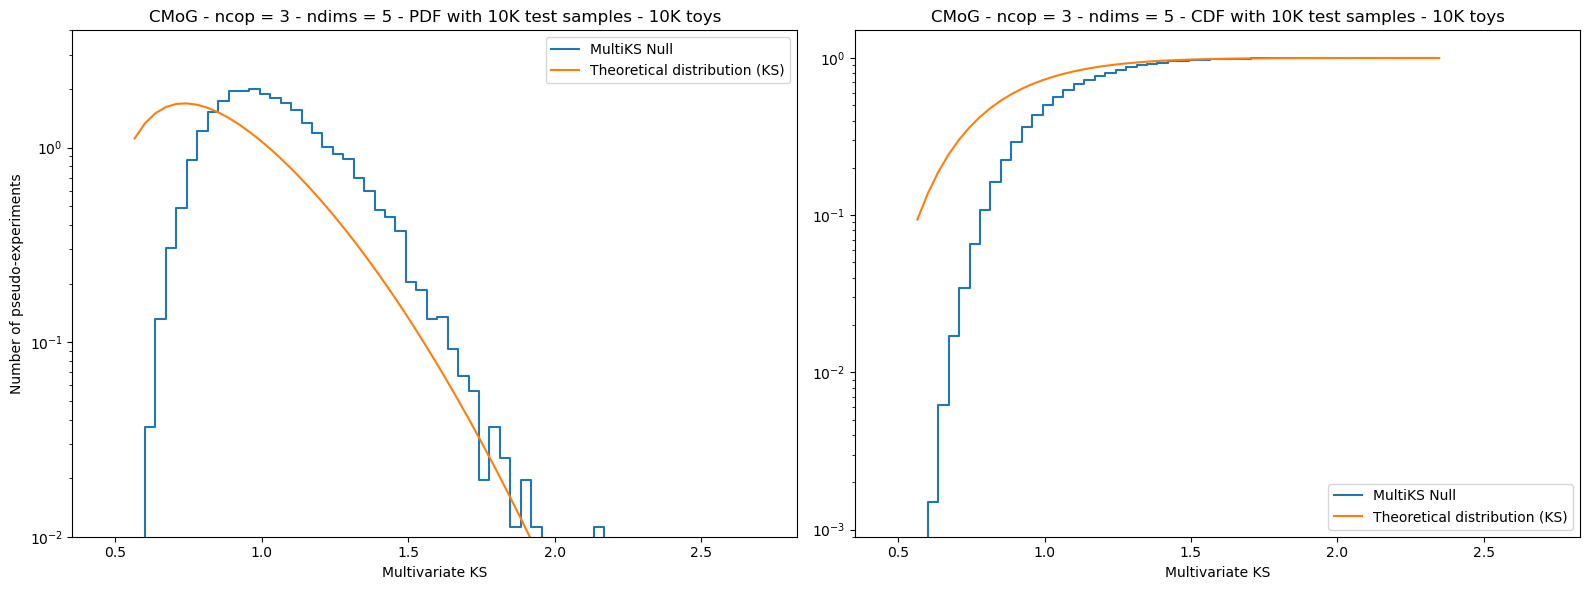

Time elapsed: 0.8825878333300352 seconds.


In [ ]:
start = timer()

nsamples = MultiKSTest.Inputs.batch_size_test
niter = MultiKSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins
dist_null = np.array(MultiKSTest.Results[-1].result_value["metric_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='MultiKS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
ax[0].set_xlim(0.005*np.sqrt(ns), 0.04*np.sqrt(ns))
ax[0].set_ylim(0.01, 4)
ax[0].set_xlabel('Multivariate KS')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='MultiKS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
ax[1].set_xlim(0.005*np.sqrt(ns), 0.04*np.sqrt(ns))
ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Multivariate KS')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
multi_ks_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
multi_ks_thresholds

[[0.68, [6800, 3199], 1.1313710353446096],
 [0.95, [9500, 500], 1.4566393387274343],
 [0.99, [9900, 100], 1.668772856652466]]

### Alternative

#### Scan and exclusion limits

In [ ]:
nsamples = 10_000
ns = nsamples**2 / (2 * nsamples)
seed = 0

fn_list = []
exclusion_list = []

fn_threshold_number = 0
required_accuracy = 0.01  # Define the required accuracy for stopping

start = timer()
eps_start = 0.0
delta_eps_factor = 0.1
delta_eps_min = 0.00001
delta_eps_max = 0.1
eps = eps_start

while fn_threshold_number < len(fn_thresholds):
    print("\n------------------")
    print(f"eps = {eps}")
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
    dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps, 0., seed)

    TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                       dist_2_input = dist_2,
                                                       niter = 10,
                                                       batch_size_test = nsamples,
                                                       batch_size_gen = 1000,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = False)

    FNMetric = GMetrics.FNMetric(TwoSampleTestInputs)
    FNMetric.Test_tf(max_vectorize=10000)
    fn = np.mean(FNMetric.Results[-1].result_value["metric_list"]) * np.sqrt(ns) / 5  # ndims=5

    fn_list.append(fn)
    
    # Determine direction of adjustment based on overshooting or undershooting
    if fn > fn_thresholds[fn_threshold_number][2]:
        # If we've overshot the threshold, we need to reduce eps, hence make delta_eps negative
        direction = -1
    else:
        # If we've undershot the threshold, we need to increase eps, hence keep delta_eps positive
        direction = 1
    
    gap_to_threshold = np.abs(fn - fn_thresholds[fn_threshold_number][2])

    # Adjust the step size based on the gap to the threshold
    delta_eps = direction * min(max(gap_to_threshold * delta_eps_factor, delta_eps_min), delta_eps_max)
    
    print(f"gap to next threshold = {gap_to_threshold}")
    print(f"delta_eps for next step = {delta_eps}")
    print(f"fn statistic = {fn} - next threshold = {fn_thresholds[fn_threshold_number][2]} at {fn_thresholds[fn_threshold_number][0]} CL")

    # Check if the fn value is within the required accuracy of the threshold
    if gap_to_threshold < required_accuracy:
        end = timer()
        print(f"=======> fn within required accuracy at {fn_thresholds[fn_threshold_number][0]} CL in {end - start} seconds")
        exclusion_list.append([eps, "fn statistic", fn, fn_thresholds[fn_threshold_number][0]])
        fn_threshold_number += 1
        eps += delta_eps  # Move eps slightly beyond the current point for the next threshold
        continue  # Proceed to check the next threshold
    
    eps += delta_eps  # Update eps for the next iteration

end = timer()
print("Time elapsed:", end - start, "seconds.")



------------------
eps = 0.0


gap to next threshold = 0.5870185538083423
delta_eps for next step = 0.058701855380834236
fn statistic = 0.6149151933550316 - next threshold = 1.201933747163374 at 0.95 CL

------------------
eps = 0.058701855380834236
gap to next threshold = 0.06782861492834336
delta_eps for next step = 0.006782861492834336
fn statistic = 1.1341051322350306 - next threshold = 1.201933747163374 at 0.95 CL

------------------
eps = 0.06548471687366857
gap to next threshold = 0.02437256846573077
delta_eps for next step = -0.0024372568465730773
fn statistic = 1.2263063156291047 - next threshold = 1.201933747163374 at 0.95 CL

------------------
eps = 0.06304746002709549
gap to next threshold = 0.009270608422623727
delta_eps for next step = 0.0009270608422623728
fn statistic = 1.1926631387407503 - next threshold = 1.201933747163374 at 0.95 CL
=======> fn within required accuracy at 0.95 CL in 37.868835888803005 seconds

------------------
eps = 0.06397452086935787
gap to next threshold = 0.3238091611366407

In [ ]:
def compute_exclusion_custom(metric_config: Dict[str,Any],
                             test_kwargs: Dict[str,Any],
                             deformation: str = "mean", # could be mean, std, or both
                             seed_dist: int = 0,
                             accuracy: float = 0.01,
                             eps_start: float = 0.0,
                             delta_eps_factor: float = 0.1,
                             delta_eps_min: float = 0.0001,
                             delta_eps_max: float = 0.1,
                             save: bool = True,
                             verbose: bool = True
                            ) -> Dict[str,Any]:
    # Generate timestamp for result
    timestamp: str = datetime.now().isoformat()
    
    # Define metric name:
    metric_name = metric_config["name"]
    metric_class = eval(metric_config["class_name"])
    metric_kwargs = metric_config["kwargs"]
    metric_result_key = metric_config["result_key"]
    metric_scale_func = metric_config["scale_func"]
    max_vectorize = metric_config["max_vectorize"]
    
    if verbose:
        print("\n======================================================")
    if deformation == "mean":
        if verbose:
            print(f"=============== {metric_config['name']} - only mean ===============")
    elif deformation == "std":
        if verbose:
            print(f"=============== {metric_config['name']} - only std ===============")
    elif deformation == "both":
        if verbose:
            print(f"=============== {metric_config['name']} - mean+std ===============")
    else:
        raise ValueError(f"Invalid value for mean_std_both: {deformation}")
    if verbose:
        print("======================================================") 
        
    
    # Compute metric scaling factor
    nsamples = test_kwargs["batch_size_test"]
    ns = nsamples**2 / (2 * nsamples)

    metrics_list = []
    eps_list = []
    exclusion_list = []

    metric_thresholds = metric_config["thresholds"][-2:]
    metric_threshold_number = 0
    required_accuracy = accuracy  # Define the required accuracy for stopping
    eps = eps_start # Initialize epsilon
    delta_eps_factor_start = delta_eps_factor

    start_global = timer()
    start = timer()
    
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed_dist)

    iteration = 0
    eps_min, eps_max = -np.inf, np.inf  # Initialize the bounds

    while metric_threshold_number < len(metric_thresholds):
        iteration += 1
        
        if deformation == "mean":
            eps_mean = eps
            eps_std = 0.
        elif deformation == "std":
            eps_mean = 0.
            eps_std = eps
        else:
            eps_mean = eps
            eps_std = eps
        
        print(f"\n------------ {iteration} ------------")
        print(f"eps = {eps}")
        
        dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_mean, eps_std, seed_dist)

        TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                           dist_2_input = dist_2,
                                                           **test_kwargs)

        Metric = metric_class(TwoSampleTestInputs, **metric_kwargs) # type: ignore
        Metric.Test_tf(max_vectorize=max_vectorize)
        metric = np.mean(Metric.Results[-1].result_value[metric_result_key]) * metric_scale_func(ns, ndims) # type: ignore

        metrics_list.append(metric)
        eps_list.append(eps)

        # Determine direction of adjustment based on overshooting or undershooting
        if metric > metric_thresholds[metric_threshold_number][2]: # type: ignore
            # If we've overshot the threshold, we need to reduce eps, hence make delta_eps negative
            direction = -1
            eps_max = min(eps, eps_max)  # Update the maximum bound
        else:
            # If we've undershot the threshold, we need to increase eps, hence keep delta_eps positive
            direction = 1
            eps_min = max(eps, eps_min)  # Update the minimum bound
            
        gap_to_threshold = np.abs(metric - metric_thresholds[metric_threshold_number][2])

        # Adjust the step size based on the gap to the threshold
        delta_eps = direction * min(max(gap_to_threshold * delta_eps_factor, delta_eps_min), delta_eps_max)
        while eps + delta_eps < 0:
            delta_eps = delta_eps/2
            
        if verbose:
            print(f"gap to next threshold = {gap_to_threshold}")
            print(f"delta_eps for next step = {delta_eps}")
            print(f"statistic = {metric} - next threshold = {metric_thresholds[metric_threshold_number][2]} at {metric_thresholds[metric_threshold_number][0]} CL")

        # Check if the fn value is within the required accuracy of the threshold
        if gap_to_threshold < required_accuracy:
            end = timer()
            if verbose:
                print(f"=======> statistic within required accuracy at {metric_thresholds[metric_threshold_number][0]} CL in {end - start} seconds")
            exclusion_list.append([metric_thresholds[metric_threshold_number][0], metric_name, eps, metric, end - start])
            metric_threshold_number += 1
            print("\n======================================================")
            print("New threshold. Resetting iteration, delta_eps_factor, eps_min, and eps_max.")
            delta_eps_factor = delta_eps_factor_start
            start = timer() # Reset the timer
            iteration = 0
            eps_min, eps_max = -np.inf, np.inf  # Initialize the bounds
        
        eps += delta_eps  # Update eps for the next iteration
        eps = max(min(eps, eps_max), eps_min)
        if eps == eps_max or eps == eps_min:
            print(f"delta_eps_factor too big for convergence: reducing from {delta_eps_factor} to {delta_eps_factor/2}")
            delta_eps_factor = delta_eps_factor / 2

    end = timer()
    if verbose:
        print("Time elapsed:", end - start_global, "seconds.")
    result = {timestamp: {"test_config": test_kwargs,
                          "null_config": metric_config,
                          "deformation": deformation,
                          "parameters": {"max_vectorize": max_vectorize,
                                         "seed_dist": seed_dist,
                                         "accuracy": accuracy,
                                         "eps_start": eps_start,
                                         "delta_eps_factor": delta_eps_factor,
                                         "delta_eps_min": delta_eps_min,
                                         "delta_eps_max": delta_eps_max,
                                         "save": save,
                                         "verbose": verbose},
                          "exclusion_list": exclusion_list,
                          "eps_list": eps_list,
                          "metrics_list": metrics_list,
                          "time_elapsed": end - start_global}}
    
    # Saving if required
    if save:
        file_path = model_dir + "exclusion_limits.json"
        if verbose:
            print(f"Saving results in the file {file_path}")
        # Step 1: Read the existing content if the file exists
        existing_data = {}
        if os.path.exists(file_path):
            try:
                with open(file_path, "r") as file:
                    existing_data = json.load(file)
            except json.JSONDecodeError:
                # File is empty or corrupted, start with an empty dictionary
                existing_data = {}
        
        # Step 2: Update the dictionary with new results
        existing_data.update(result)
        
        # Step 3: Write the updated dictionary back to the file
        # Use this custom encoder when dumping your JSON data
        with open(file_path, "w") as file:
            json.dump(existing_data, file, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore
    
    return result

In [ ]:
nsamples = 10_000
ns = nsamples**2 /(2*nsamples)

fn_list = []
fpd_list = []
kpd_list = []
ks_list = []
sks_list = []
swd_list = []
exclusion_list = []

fn_threshold_number = 0
fpd_threshold_number = 0
kpd_threshold_number = 0
ks_threshold_number = 0
sks_threshold_number = 0
swd_threshold_number = 0

start = timer()  
for i in range(50):
    seed = 0
    ncomp = 3
    ndims = 5
    eps = 0.001*i
    print("\n------------------")
    print(f"eps = {eps}")
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
    dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps, 0., seed)

    TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                       dist_2_input = dist_2,
                                                       niter = 10,
                                                       batch_size_test = nsamples,
                                                       batch_size_gen = 1000,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = False)

    FNMetric = GMetrics.FNMetric(TwoSampleTestInputs)
    FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs)
    KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs)
    KSTest = GMetrics.KSTest(TwoSampleTestInputs)
    SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,nslices = 100,seed_slicing = 0)
    SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,nslices = 100,seed_slicing = 0)

    if fn_threshold_number < len(fn_thresholds):
        FNMetric.Test_tf(max_vectorize = 10000)
        fn = np.mean(FNMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)/ndims
        fn_list.append(fn)
        print(f"fn statistic = {fn}\t-\t next threshold = {fn_thresholds[fn_threshold_number][2]} at {fn_thresholds[fn_threshold_number][0]} CL")
        fn_threshold = fn_thresholds[fn_threshold_number]
        if fn > fn_threshold[2]:
            end = timer()
            print(f"=======> fn excluded at {fn_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fn statistic", fn, fn_threshold[0]])
            fn_threshold_number += 1
            
    if fpd_threshold_number < len(fpd_thresholds):
        FPDMetric.Test_tf(max_vectorize=400)
        fpd = np.mean(FPDMetric.Results[-1].result_value["metric_list"])*(ns/ndims)**(3/2)
        fpd_list.append(fpd)
        print(f"fpd statistic = {fpd}\t-\t next threshold = {fpd_thresholds[fpd_threshold_number][2]} at {fpd_thresholds[fpd_threshold_number][0]} CL")
        fpd_threshold = fpd_thresholds[fpd_threshold_number]
        if fpd > fpd_threshold[2]:
            end = timer()
            print(f"=======> fpd excluded at {fpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fpd statistic", fpd, fpd_threshold[0]])
            fpd_threshold_number += 1
            
    if kpd_threshold_number < len(kpd_thresholds):
        KPDMetric.Test_tf(max_vectorize=2)
        kpd = np.mean(KPDMetric.Results[-1].result_value["metric_list"])*ns/np.sqrt(ndims)
        kpd_list.append(kpd)
        print(f"kpd statistic = {kpd}\t-\t next threshold = {kpd_thresholds[kpd_threshold_number][2]} at {kpd_thresholds[kpd_threshold_number][0]} CL")
        kpd_threshold = kpd_thresholds[kpd_threshold_number]
        if kpd > kpd_threshold[2]:
            end = timer()
            print(f"=======> kpd excluded at {kpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "kpd statistic", kpd, kpd_threshold[0]])
            kpd_threshold_number += 1

    if ks_threshold_number < len(ks_thresholds):
        KSTest.Test_tf(max_vectorize=10000)
        ks = np.mean(KSTest.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
        ks_list.append(ks)
        print(f"ks statistic = {ks}\t-\t next threshold = {ks_thresholds[ks_threshold_number][2]} at {ks_thresholds[ks_threshold_number][0]} CL")
        ks_threshold = ks_thresholds[ks_threshold_number]
        if ks > ks_threshold[2]:
            end = timer()
            print(f"=======> ks excluded at {ks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "ks statistic", ks, ks_threshold[0]])
            ks_threshold_number += 1
            
    if sks_threshold_number < len(sks_thresholds):
        SKSTest.Test_tf(max_vectorize=10000)
        sks = np.mean(SKSTest.Results[-1].result_value["metric_means"])*np.sqrt(ns)
        sks_list.append(sks)
        print(f"sks statistic = {sks}\t-\t next threshold = {sks_thresholds[sks_threshold_number][2]} at {sks_thresholds[sks_threshold_number][0]} CL")
        sks_threshold = sks_thresholds[sks_threshold_number]
        if sks > sks_threshold[2]:
            end = timer()
            print(f"=======> sks excluded at {sks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "sks statistic", sks, sks_threshold[0]])
            sks_threshold_number += 1
            
    if swd_threshold_number < len(swd_thresholds):
        SWDMetric.Test_tf(max_vectorize=10000)
        swd = np.mean(SWDMetric.Results[-1].result_value["metric_means"])*np.sqrt(ns/ndims)
        swd_list.append(swd)
        print(f"swd statistic = {swd}\t-\t next threshold = {swd_thresholds[swd_threshold_number][2]} at {swd_thresholds[swd_threshold_number][0]} CL")
        swd_threshold = swd_thresholds[swd_threshold_number]
        if swd > swd_threshold[2]:
            end = timer()
            print(f"=======> swd excluded at {swd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "swd statistic", swd, swd_threshold[0]])
            swd_threshold_number += 1
            
    if fn_threshold_number >= len(fn_thresholds) and fpd_threshold_number >= len(fpd_thresholds) and kpd_threshold_number >= len(kpd_thresholds) and ks_threshold_number >= len(ks_thresholds) and sks_threshold_number >= len(sks_thresholds) and swd_threshold_number >= len(swd_thresholds):
        break
                        
end = timer()
print("Time elapsed:", end-start, "seconds.")


------------------
eps = 0.0


fn statistic = 0.6149151933550316	-	 next threshold = 1.201933747163374 at 0.95 CL
fpd statistic = 2.425792914283051	-	 next threshold = 4.329877652456557 at 0.95 CL
kpd statistic = 0.05446071738496035	-	 next threshold = 0.30746255888564705 at 0.95 CL
ks statistic = 0.8629535201000684	-	 next threshold = 1.1313706138761246 at 0.95 CL
sks statistic = 0.9011867136740952	-	 next threshold = 1.112986448315256 at 0.95 CL
swd statistic = 0.664611395983557	-	 next threshold = 0.985047394005539 at 0.95 CL

------------------
eps = 0.001
fn statistic = 0.617495086161927	-	 next threshold = 1.201933747163374 at 0.95 CL
fpd statistic = 2.4299351460220264	-	 next threshold = 4.329877652456557 at 0.95 CL
kpd statistic = 0.05498660273579473	-	 next threshold = 0.30746255888564705 at 0.95 CL
ks statistic = 0.8626708306503937	-	 next threshold = 1.1313706138761246 at 0.95 CL
sks statistic = 0.9038879051951583	-	 next threshold = 1.112986448315256 at 0.95 CL
swd statistic = 0.665557798084256	-	 next t

KeyboardInterrupt: 